# Load and import 

In [1]:
R.version.string
getwd()
library('dplyr')
library("DESeq2")
library('stringr')
library('EnhancedVolcano')
library('pheatmap')
library("vsn")
library('tidyr')
library('ggplot2')

[1] "R version 4.2.2 (2022-10-31)"

[1] "/media/HDD2/donghui/Pathogen_JC14_3DM"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching 

In [2]:
# Read the xlsx file
map_id_name <- readxl::read_excel("../gene_table_and_other_scripts/gene_table.xlsx")
map_id_name <- map_id_name %>% mutate(gene_name = gene_name %>% str_remove("'"))
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT1G09307,AT1G09307
AT5G43211,AT5G43211


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')


Attaching package: ‘gridExtra’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine




### sample data

In [4]:
sample_data = readxl::read_excel("./refs//3-DM_shoots_root_JC14_adr1s_pathogen.xlsx") %>% as.data.frame
rownames(sample_data) <- sample_data$short_name 
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group3,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


## Hisat2

In [5]:
# skip the first line, it is command of featurecount
pathogen_data <- read.table("..//RNA_seq_Pathogen/featureCounts//all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)
pathogen_data %>% sample_n(2)

Geneid,Chr,Start,End,Strand,Length,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam,⋯,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam,X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT5G26594,5;5,9269282;9270072,9269518;9270254,+;+,420,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AT3G62245,3,23036880,23036952,+,73,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# skip the first line, it is command of featurecount
DM10_DM11_data <- read.table("../3DMs_pathogen/featureCounts/DM10_DM11_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [7]:
# skip the first line, it is command of featurecount
DM1_DM2d_data <- read.table("../3DMs_pathogen/featureCounts/DM1_DM2d_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [8]:
# skip the first line, it is command of featurecount
DM6_DM7_data <- read.table("../3DMs_pathogen/featureCounts/DM6_DM7_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [9]:
# skip the first line, it is command of featurecount
JC14_data <- read.table("../JC14_and_DMs//featureCounts/JC14_all_feature_of_genes.txt", header=TRUE, quote="\t", skip=1)

In [10]:
data <- pathogen_data %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(DM10_DM11_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM6_DM7_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>%
    full_join(DM1_DM2d_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) %>% 
    full_join(JC14_data, by = 'Geneid') %>% select(-c( Chr, Start, End, Strand, Length)) 

In [11]:
length(names(data))
names(data)

[1] 83

[1] "Geneid"                                                                          
 [2] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.A.LFC7257_L2_sorted.bam" 
 [3] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.C.LFC7271_L2_sorted.bam"
 [4] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.C.LFC7250_L3_sorted.bam"  
 [5] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.B.LFC7249_L3_sorted.bam"  
 [6] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.B.LFC7273_L2_sorted.bam"
 [7] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.B.LFC7258_L2_sorted.bam" 
 [8] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.A.LFC7275_L2_sorted.bam"
 [9] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.C.LFC7277_L3_sorted.bam"
[10] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S20.B.LFC7276_L2_sorted.bam"
[11] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.C.LFC7256_L2_sorted.bam" 
[12] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.C.LFC7274_L3_sorted.bam"
[13] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.C.A.LFC7248_L2_sorted.bam"  
[14] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.B.LFC7252_L2_sorted.bam" 
[15] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.C.LFC7268_L2_sorted.bam"
[16] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.C.LFC7253_L3_sorted.bam" 
[17] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.A.LFC7260_L2_sorted.bam"
[18] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.C.LFC7262_L2_sorted.bam"
[19] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.B.LFC7270_L2_sorted.bam"
[20] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M12.B.LFC7261_L3_sorted.bam"
[21] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.B.LFC7267_L2_sorted.bam"
[22] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M20.A.LFC7269_L3_sorted.bam"
[23] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.B.LFC7264_L3_sorted.bam"
[24] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.B.LFC7255_L2_sorted.bam" 
[25] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S6.C.LFC7259_L2_sorted.bam" 
[26] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.A.LFC7263_L2_sorted.bam"
[27] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.M6.A.LFC7251_L2_sorted.bam" 
[28] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R12.C.LFC7265_L2_sorted.bam"
[29] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R6.A.LFC7254_L2_sorted.bam" 
[30] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.S12.A.LFC7266_L3_sorted.bam"
[31] "X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.R20.A.LFC7272_L2_sorted.bam"
[32] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138684_sorted.bam"                          
[33] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138674_sorted.bam"                          
[34] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138670_sorted.bam"                          
[35] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138668_sorted.bam"                          
[36] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138667_sorted.bam"                          
[37] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138669_sorted.bam"                          
[38] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138679_sorted.bam"                          
[39] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138681_sorted.bam"                          
[40] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138676_sorted.bam"                          
[41] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138671_sorted.bam"                          
[42] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138682_sorted.bam"                          
[43] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138672_sorted.bam"                          
[44] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138675_sorted.bam"                          
[45] "X.media.HDD3.3DM.DM10_DM11.2_bam.ERR4138673_sorted.bam"                          
[46] "X.media.HDD3.3DM.DM10_DM11.2_bam.ER

In [12]:
names(data) <- names(data) %>% 
    str_remove('X.media.HDD3.partial_pathogen_RNA_raw_1.hisat2.2_bam.') %>%    
    str_remove('.LFC\\d{4}_L\\d{1,2}_sorted.bam') %>% str_remove('X.media.HDD3.3DM.') %>%
     str_remove('DM10_DM11.2_bam.') %>% str_remove('DM6_DM7.2_bam.') %>%
     str_remove('DM1_DM2d.2_bam.') %>% str_remove('_sorted.bam') %>% str_replace_all('\\.', '-') %>% str_remove('_L4') %>%
    str_remove('X-media-HDD3-JC14-2_bam-') %>% str_remove('-LFD\\d{4,5}_L2$')
names(data)

[1] "Geneid"     "S6-A"       "M20-C"      "C-C"        "C-B"       
 [6] "R20-B"      "S6-B"       "S20-A"      "S20-C"      "S20-B"     
[11] "R6-C"       "R20-C"      "C-A"        "M6-B"       "S12-C"     
[16] "M6-C"       "M12-A"      "M12-C"      "M20-B"      "M12-B"     
[21] "S12-B"      "M20-A"      "R12-B"      "R6-B"       "S6-C"      
[26] "R12-A"      "M6-A"       "R12-C"      "R6-A"       "S12-A"     
[31] "R20-A"      "ERR4138684" "ERR4138674" "ERR4138670" "ERR4138668"
[36] "ERR4138667" "ERR4138669" "ERR4138679" "ERR4138681" "ERR4138676"
[41] "ERR4138671" "ERR4138682" "ERR4138672" "ERR4138675" "ERR4138673"
[46] "ERR4138678" "ERR4138683" "ERR4138680" "ERR4138677" "17-LCH3320"
[51] "14-LCH3317" "27-LCH3324" "11-LCH3314" "15-LCH3318" "21-LCH3322"
[56] "16-LCH3319" "18-LCH3321" "22-LCH3323" "28-LCH3325" "12-LCH3315"
[61] "13-LCH3316" "COL7_ROO"   "DM5_ROOT"   "DM1_ROOT"   "COL3_ROO"  
[66] "DM6_SHOO"   "DM13_ROO"   "DM2_SHOO"   "COL4_SHO"   "DM14_SHO"  
[71] "COL8_SHO"   "CJ-1"       "CJ-2"       "C12-2"      "OJ-2"      
[76] "DJ-3"       "DJ-2"       "OJ-3"       "OJ-1"       "C14-1"     
[81] "C12-1"      "CJ-3"       "DJ-1"

 <font size="4"><span style="color:blue">
    the naming:  
               S is Rps4, M is Mock, C is control, R is Rpt2  
</span></font>

In [13]:
countData <- data %>% dplyr::select ( sample_data$Bam_name)
rownames(countData) <- data$Geneid
head(countData)

,DM2_SHOO,COL4_SHO,DM6_SHOO,COL8_SHO,DM14_SHO,12-LCH3315,14-LCH3317,16-LCH3319,18-LCH3321,22-LCH3323,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AT1G30814,90,4,129,0,96,71,0,158,0,78,⋯,48,0,0,0,210,208,196,224,179,143
AT1G78930,209,402,111,462,168,383,369,372,331,410,⋯,850,461,619,650,301,202,274,259,312,289
AT1G71695,1568,10440,1412,12570,1578,4176,13325,2848,13770,4118,⋯,4132,4491,4511,4365,2924,2886,2595,3360,3005,3381
AT1G58983,18,7,9,4,9,29,32,28,36,35,⋯,63,67,51,65,34,33,18,32,28,46
AT1G12980,6,13,6,2,22,20,4,29,0,30,⋯,12,0,0,5,10,4,0,10,12,13
AT1G45223,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
all (names(countData) == sample_data$Bam_name)

[1] TRUE

In [15]:
names(countData) <- sample_data$short_name
sample_data <- sample_data %>% dplyr::rename('group' = 'group3')
rownames(sample_data) <- sample_data$short_name

In [16]:
all (names(countData) == rownames(sample_data))

[1] TRUE

## remove root samples, only keep shoot sample

In [17]:
sample_data

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_1,DM1/DM2d_1,DM1/DM2d_Shoot_1,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,1,DM2_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_1,Col-0_12_1,Col-0_Shoot_1,WT,Shoot,WT,12,Col-0,1/2MS,1,COL4_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_2,DM1/DM2d_2,DM1/DM2d_Shoot_2,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,2,DM6_SHOO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
Col-0_12_2,Col-0_12_2,Col-0_Shoot_2,WT,Shoot,WT,12,Col-0,1/2MS,2,COL8_SHO,NA,NA,Col-0_Shoot,Col-0_12,Col-0_12,0,control,1
DM1/DM2d_3,DM1/DM2d_3,DM1/DM2d_Shoot_3,DM,Shoot,DM1/DM2d,12,Col-0,1/2MS,3,DM14_SHO,NA,NA,DM1/DM2d_Shoot,DM1/DM2d,DM1/DM2d,0,control,1
DM6/DM7_1,DM6/DM7_1,DM6/DM7_Shoot_1,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,1,12-LCH3315,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_1,Col-0_14_1,Col-0_Shoot_1,WT,Shoot,WT,14,Col-0,1/2MS,1,14-LCH3317,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2
DM6/DM7_2,DM6/DM7_2,DM6/DM7_Shoot_2,DM,Shoot,DM6/DM7,14,Col-0,1/2MS,2,16-LCH3319,NA,NA,DM6/DM7_Shoot,DM6/DM7,DM6/DM7,0,control,2
Col-0_14_2,Col-0_14_2,Col-0_Shoot_2,WT,Shoot,WT,14,Col-0,1/2MS,2,18-LCH3321,NA,NA,Col-0_Shoot,Col-0_14,Col-0_14,0,control,2


In [19]:
sample_data <- sample_data %>% mutate(group = group %>% str_remove('DAG$') %>% str_replace('Root_\\d_', 'Root_'), group1 = group1 %>% str_remove('DAG$') %>% str_replace('Root_\\d_', 'Root_'), group2 = group2 %>% str_remove('DAG$') %>% str_replace('Root_\\d_', 'Root_'))

In [20]:
# sample_data <- sample_data %>% filter(tissue == 'Shoot')

countData <- countData %>% select(rownames(sample_data))
all (names(countData) == rownames(sample_data))

[1] TRUE

## build dds

In [28]:
## construct dds

# put the variable of interest at the end of formula so res function will take condition by default
dds <- DESeqDataSetFromMatrix(countData, colData=sample_data, design= ~  batch + group) 
dds <- dds[ rowSums(counts(dds)) > 5, ]

dds <- DESeq(dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a mess

In [29]:
dds

class: DESeqDataSet 
dim: 28127 82 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(28127): AT1G30814 AT1G78930 ... ATCG01180 ATCG00950
rowData names(115): baseMean baseVar ... maxCooks replace
colnames(82): DM1/DM2d_1 Col-0_12_1 ... S20-B S20-C
colData names(20): short_name sample_Names ... sizeFactor replaceable

### salmon quants files

In [32]:
dds <- readRDS('./Rdata/dds_hisat2_Shoot_and_Root.rds')

In [33]:
dds

class: DESeqDataSet 
dim: 28127 82 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(28127): AT1G30814 AT1G78930 ... ATCG01180 ATCG00950
rowData names(115): baseMean baseVar ... maxCooks replace
colnames(82): DM1/DM2d_1 Col-0_12_1 ... S20-B S20-C
colData names(20): short_name sample_Names ... sizeFactor replaceable

In [34]:
res_AvrRpt2_vs_Control <- results(dds, contrast = c('group','AvrRps4-20h', 'Mock-20h'))  


In [195]:
sample_data %>% filter(group %>% str_detect('Root'))

,short_name,sample_Names,genotype,tissue,DM,DAS,accession,media,replicate,Bam_name,ERS,ERR,group1,group2,group,hpi,treatment,batch
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DM1/DM2d_Root_1,DM1/DM2d_Root_1,DM1/DM2d_Root_1,DM,Root,DM1_DM2d,12,Col-0,1/2MS,1,DM1_ROOT,NA,NA,DM1/DM2d_Root_12,DM1/DM2d_Root_12,DM1/DM2d_Root_12,2,control,1
Col-0_12_Root_1,Col-0_12_Root_1,Col-0_12_Root_1,WT,Root,WT,12,Col-0,1/2MS,1,COL3_ROO,NA,NA,Col-0_Root_12,Col-0_Root_12,Col-0_Root_12,3,control,1
DM1/DM2d_Root_2,DM1/DM2d_Root_2,DM1/DM2d_Root_2,DM,Root,DM1_DM2d,12,Col-0,1/2MS,2,DM5_ROOT,NA,NA,DM1/DM2d_Root_12,DM1/DM2d_Root_12,DM1/DM2d_Root_12,4,control,1
Col-0_12_Root_2,Col-0_12_Root_2,Col-0_12_Root_2,WT,Root,WT,12,Col-0,1/2MS,2,COL7_ROO,NA,NA,Col-0_Root_12,Col-0_Root_12,Col-0_Root_12,5,control,1
DM1/DM2d_Root_3,DM1/DM2d_Root_3,DM1/DM2d_Root_3,DM,Root,DM1_DM2d,12,Col-0,1/2MS,3,DM13_ROO,NA,NA,DM1/DM2d_Root_12,DM1/DM2d_Root_12,DM1/DM2d_Root_12,6,control,1
DM6/DM7_Root_1,DM6/DM7_Root_1,DM6/DM7_Root_1,DM,Root,DM6_DM7,14,Col-0,1/2MS,1,11-LCH3314,NA,NA,DM6/DM7_Root_14,DM6/DM7_Root_14,DM6/DM7_Root_14,7,control,2
Col-0_14_Root_1,Col-0_14_Root_1,Col-0_14_Root_1,WT,Root,WT,14,Col-0,1/2MS,1,13-LCH3316,NA,NA,Col-0_Root_14,Col-0_Root_14,Col-0_Root_14,8,control,2
DM6/DM7_Root_2,DM6/DM7_Root_2,DM6/DM7_Root_2,DM,Root,DM6_DM7,14,Col-0,1/2MS,2,15-LCH3318,NA,NA,DM6/DM7_Root_14,DM6/DM7_Root_14,DM6/DM7_Root_14,9,control,2
Col-0_14_Root_2,Col-0_14_Root_2,Col-0_14_Root_2,WT,Root,WT,14,Col-0,1/2MS,2,17-LCH3320,NA,NA,Col-0_Root_14,Col-0_Root_14,Col-0_Root_14,10,control,2


In [196]:
res_DM6_DM7_Root <- results(dds, contrast = c('group','DM6/DM7_Root_14', 'Col-0_Root_14'))
res_DM1_DM2d_Root <- results(dds, contrast = c('group','DM1/DM2d_Root_12', 'Col-0_Root_12'))

In [225]:
res_DM6_DM7_Root %>% saveRDS('./Rdata/res_DM6_DM7_Root.Rds')
res_DM1_DM2d_Root %>% saveRDS('./Rdata/res_DM1_DM2d_Root.Rds')

In [35]:
# Estimate Dispersion Trend?
vsd <- vst(dds)

In [36]:
vst <- vst(dds) %>% assay()
vst %>% str

 num [1:28127, 1:82] 6.84 7.63 10.13 5.85 5.48 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:28127] "AT1G30814" "AT1G78930" "AT1G71695" "AT1G58983" ...
  ..$ : chr [1:82] "DM1/DM2d_1" "Col-0_12_1" "DM1/DM2d_2" "Col-0_12_2" ...


In [37]:
vst

,DM1/DM2d_1,Col-0_12_1,DM1/DM2d_2,Col-0_12_2,DM1/DM2d_3,DM6/DM7_1,Col-0_14_1,DM6/DM7_2,Col-0_14_2,DM6/DM7_3,⋯,S12-C,M20-A,M20-B,M20-C,R20-A,R20-B,R20-C,S20-A,S20-B,S20-C
AT1G30814,6.841580,5.450746,7.220049,4.964194,6.929516,6.490043,4.964194,6.960590,4.964194,6.496242,⋯,6.627901,4.964194,4.964194,4.964194,8.201184,8.167452,8.203271,8.267984,7.964546,7.751980
AT1G78930,7.633785,8.715365,7.081378,8.959215,7.450504,8.051718,8.137249,7.799167,7.989922,8.032327,⋯,9.783984,9.010101,9.435791,9.505255,8.633286,8.133583,8.604739,8.440939,8.619542,8.564045
AT1G71695,10.129318,13.201069,10.078983,13.545820,10.192863,11.176476,12.983693,10.368985,13.001466,11.037411,⋯,11.983598,12.134204,12.187526,12.145987,11.704272,11.658246,11.635511,11.890629,11.676342,11.887849
AT1G58983,5.850299,5.605601,5.617044,5.464107,5.608209,5.965253,6.071301,5.858887,6.123784,6.015920,⋯,6.842167,6.912644,6.717011,6.918111,6.486051,6.452001,6.133097,6.439138,6.325497,6.697016
AT1G12980,5.481097,5.832343,5.498741,5.318566,5.959611,5.800546,5.364010,5.874223,4.964194,5.940852,⋯,5.829868,4.964194,4.964194,5.544569,5.815916,5.502318,4.964194,5.812806,5.873672,5.923962
AT1G56250,8.059022,7.897551,7.577289,9.302847,8.177679,7.101419,6.658833,6.145731,6.123784,6.746133,⋯,7.558468,6.184334,5.332053,6.298793,9.214035,9.081421,9.191985,8.112559,8.287896,8.463235
AT1G66852,4.964194,4.964194,4.964194,4.964194,5.269741,4.964194,4.964194,4.964194,4.964194,4.964194,⋯,4.964194,4.964194,4.964194,4.964194,4.964194,4.964194,4.964194,4.964194,4.964194,4.964194
AT1G69810,8.990795,7.332936,8.954493,7.500102,8.803279,8.998456,7.467289,9.592660,6.920915,9.309490,⋯,8.443676,7.367295,7.185042,7.177852,10.417401,10.655308,10.646468,9.823572,9.914899,9.812547
AT1G72450,11.718178,11.827630,11.554358,11.488351,11.559556,11.998761,12.055363,11.521573,12.306690,11.769194,⋯,14.151584,12.122754,12.090282,11.837888,14.391996,14.450028,14.484476,14.270136,14.350155,14.130727
AT1G76280,9.732014,10.512248,9.763220,10.672405,9.907149,9.499827,10.174663,9.670860,9.965725,9.363773,⋯,9.983027,10.621179,10.576361,10.509316,9.605597,9.604418,9.354854,9.750893,9.738248,9.690647


##### output for WGCNA

In [38]:
##output for WGCNA
varianceStabilizingTransformation(dds, blind=F) %>% assay %>% saveRDS('./Rdata/vst_Shoot_Root.Rds')

## PCA plot

In [39]:
library(PCAtools)
p <- PCAtools::pca(vst, metadata = sample_data, removeVar = 0.1)


Attaching package: ‘PCAtools’


The following objects are masked from ‘package:stats’:

    biplot, screeplot


-- removing the lower 10% of variables based on variance



In [40]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 100)
# options(jupyter.plot_mimetypes = "image/svg+xml") 
options(jupyter.plot_mimetypes = "image/png") 
screeplot <- screeplot(p, axisLabSize = 8, titleLabSize = 22)  
screeplot %>%  ggsave(file = paste0("./plots/screeplot", Sys.time(), ".pdf") , width = 10, height = 6)

In [41]:
options(repr.plot.width=12, repr.plot.height=12, repr.plot.res = 100)
biplot(p, showLoadings = TRUE,
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>% 
    ggsave(file = paste0("./plots/biplot_PCA_loading", Sys.time(), ".pdf") , width = 12, height = 12)

Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [42]:
biplot(p, #showLoadings = TRUE, 
       x = 'PC2', y = 'PC3',
    labSize = 5, pointSize = 5, sizeLoadingsNames = 5) %>%
    ggsave(file = paste0("./plots/biplot_PCA_2_3_", Sys.time(), ".pdf") , width = 12, height = 12)

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [43]:
p_for_plot <- p$rotated %>% cbind(p$metadata) 

In [44]:
p_for_plot <- p_for_plot %>% mutate(shape_group = group2 %>% str_remove('-\\d{1,2}h$'))

In [45]:
p_for_plot <- p_for_plot %>%
  mutate(group = ifelse(group1 == "control", "Col-0_12", group))
# p_for_plot

In [46]:
p_for_plot$group %>% unique

[1] "DM1/DM2d"          "Col-0_12"          "DM6/DM7"          
 [4] "Col-0_14"          "DM10/DM11"         "Parents_DM10_DM11"
 [7] "DM1/DM2d_Root_12"  "Col-0_Root_12"     "DM6/DM7_Root_14"  
[10] "Col-0_Root_14"     NA                  "Mock-6h"          
[13] "AvrRpt2-6h"        "AvrRps4-6h"        "Mock-12h"         
[16] "AvrRpt2-12h"       "AvrRps4-12h"       "Mock-20h"         
[19] "AvrRpt2-20h"       "AvrRps4-20h"

In [47]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

custom_shapes <- c(
  'control' = 16, 'Mock' = 18, 'AvrRps4' = 17, 'AvrRpt2' = 17, 
  "DM6/DM7" = 16, 'DM1/DM2d' = 16, 'DM10/DM11' = 16,
  'Col-0_12' = 16, 'Col-0_14' = 16,
  'Tuescha-9' = 16, 'Cdm-0' = 16, 'Tuescha-9' = 16, 'Cdm-0' = 16, 
  'DM6/DM7_adr1s' = 16, 'DM1/DM2d_adr1s' = 16, 'Col-0_adr1s' = 16
)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”
Warning message:
“Duplicated `override.aes` is ignored.”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


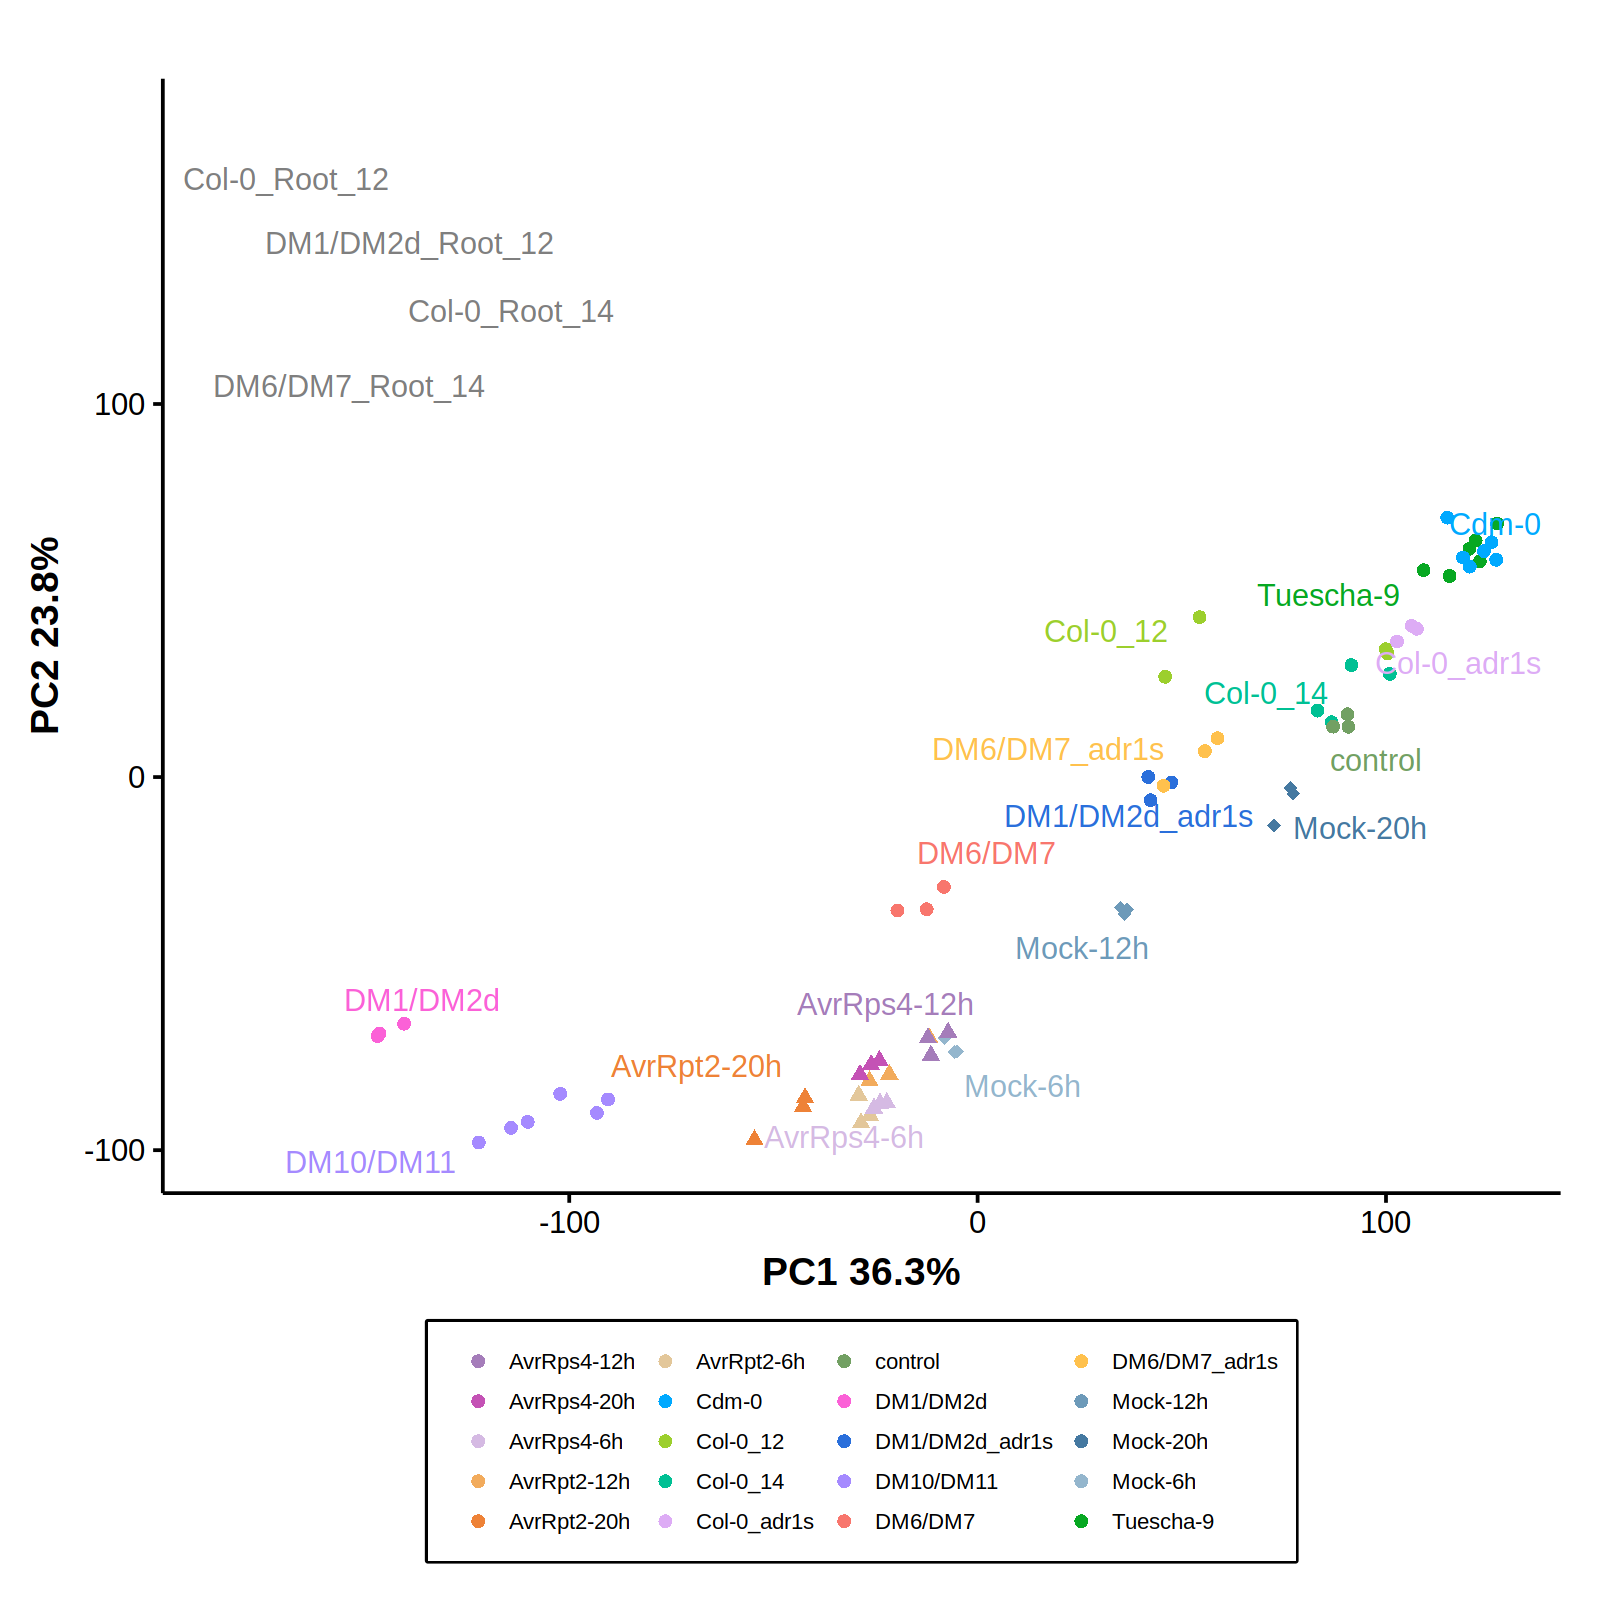

In [48]:
library(ggplot2)
library(ggrepel)
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 200)


# Create a new data frame with only one row per group
unique_group_data <- p_for_plot %>%
  group_by(group2) %>%
  slice_head(n = 1) %>%
  ungroup()

# Create PCA plot
pca_gg <- ggplot(p_for_plot, aes(PC1, PC2, fill = group2, color = group2, shape = shape_group)) + 
  # Add jittered points
  geom_jitter(size = 2, width = 0.05) + 
  # Add x-axis label
  xlab(paste0("PC1 ", round(p$variance[1], 1), "%")) + 
  # Add y-axis label
  ylab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  # Apply publication theme
  theme_Publication() +
  # Add repel labels without "a" character
  geom_label_repel(aes(label = group2), data = unique_group_data,
                    segment.color = NA, fill = NA, label.size = 0, show.legend = FALSE) +
  # Customize shape legend
  scale_shape_manual(values = custom_shapes, name = "Group", guide = guide_none()) + 
  # Customize fill legend
  scale_fill_manual(values = custom_colors, name = NULL) + 
  # Customize color legend
  scale_color_manual(values = custom_colors, name = NULL) +
  # Apply publication theme again
  theme_Publication() +
  # Set legend aesthetics
  guides(fill = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL),
         color = guide_legend(override.aes = list(shape = 16), ncol = 4, title = NULL)) +
  # Customize legend text size, key size, and add a border
  theme(
        legend.title = element_text(size = 8),
        legend.text = element_text(size = 8),
        legend.key.size = unit(1, "lines"),
        legend.box.background = element_rect(color = "black", size = 1)) +
  # Set legend position
  # theme(legend.position = c(0.62, 0.13)) 
  theme(legend.position = 'bottom')

# Show the plot
print(pca_gg)

# Save the plot
pca_gg %>% ggsave(file = paste0("./plots/PCA_PC1_PC2_", Sys.time(), ".pdf") , width = 6, height = 6)



In [49]:
pc2_pc3 <- ggplot(p_for_plot, aes(PC2, PC3, fill = group,color = group, shape = shape_group)) + 
  geom_jitter(size = 5, width = 0.05) + 
  xlab(paste0("PC2 ", round(p$variance[2], 1), "%")) + 
  ylab(paste0("PC3 ", round(p$variance[3], 1), "%")) + 
  theme_Publication() +
geom_label_repel(aes(label = group), data = unique_group_data, fill = NA, label.size = 0) +
  scale_shape_manual(values = custom_shapes) + 
  scale_fill_manual(values = custom_colors) + 
  scale_color_manual(values = custom_colors) +
  theme_Publication() + 
  theme(legend.position = "none")
pc2_pc3 %>%  ggsave(file = paste0("./plots/PC2_PC3_", Sys.time(), ".pdf") , width = 8, height = 8)

Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_label_repel()`).”


In [50]:
options(repr.plot.width=16, repr.plot.height=9)
plotloadings(p,
    rangeRetain = 0.01,
    labSize = 4.0,
    title = 'Loadings plot',
    subtitle = 'PC1, PC2, PC3, PC4',
    caption = 'Top 1% variables',
    shape = 24,
    col = c('limegreen', 'black', 'red3'),
    drawConnectors = TRUE) %>% 
    ggsave(file = paste0("./plots/plotloadings", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT2G10940, AT3G01420, AT2G01520, AT4G37990, AT3G01345, ATCG01130, AT5G03350, AT1G68050, AT1G56660, ATCG00580, ATCG00020, ATCG00490

Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [51]:
options(repr.plot.width=16, repr.plot.height=12)
plotloadings(p, labSize = 3)  %>% 
    ggsave(file = paste0("./plots/plotloadings2", Sys.time(), ".pdf") , width = 10, height = 6)

-- variables retained:

AT1G29920, AT1G29910, AT2G34430, AT2G10940, AT5G38420, AT3G01420, AT4G11650, AT2G01520, AT4G11320, AT2G38240, AT4G37990, AT1G32350, AT1G15520, AT3G01345, AT2G14610, ATCG01130, AT2G44240, AT1G31580, AT5G24150, AT5G03350, AT1G68050, AT2G21660, AT5G60100, AT3G41768, AT1G56660, ATMG00020, ATCG00510, ATCG00580, ATCG00020, ATCG00340, ATCG00490, ATCG00040, ATCG00630, ATCG00680

Warning message:
“ggrepel: 79 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [241]:
dds <- estimateSizeFactors(dds)
counts_normalized <- DESeq2::counts(dds, normalized=TRUE)  %>% as.data.frame %>% 
    tibble::rownames_to_column(var = "AGI") 

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [242]:
mean_sd_count <- counts_normalized %>%
  pivot_longer(cols = -AGI, names_to = 'sample', values_to = 'count') %>% 
  left_join(sample_data %>% dplyr::select(short_name, group), by = c('sample' = 'short_name')) %>%
  group_by(AGI, group) %>% 
  summarise(mean_count = mean(count),
            sd = sd(count))
mean_sd_count <- mean_sd_count %>% left_join(map_id_name, by = c('AGI' = 'gene_id'))

`summarise()` has grouped output by 'AGI'. You can override using the `.groups`
argument.


In [243]:
mean_sd_count %>% pull(group) %>% unique

[1] "AvrRps4-12h"       "AvrRps4-20h"       "AvrRps4-6h"       
 [4] "AvrRpt2-12h"       "AvrRpt2-20h"       "AvrRpt2-6h"       
 [7] "Col-0_12"          "Col-0_12_2"        "Col-0_14"         
[10] "Col-0_adr1s"       "Col-0_Root_12"     "Col-0_Root_14"    
[13] "control"           "DM1/DM2d"          "DM1/DM2d_adr1s"   
[16] "DM1/DM2d_Root_12"  "DM10/DM11"         "DM6/DM7"          
[19] "DM6/DM7_adr1s"     "DM6/DM7_Root_14"   "Mock-12h"         
[22] "Mock-20h"          "Mock-6h"           "Parents_DM10_DM11"

In [244]:
mean_sd_count <- mean_sd_count %>% mutate(background = case_when(
  group %>% str_detect('Avr') ~ "Col-0",
  group %>% str_detect('Mock') ~ "Col-0",
  group %>% str_detect('control') ~ "Col-0",
  group %>% str_detect('Col-0_adr1s|Col-0_12_2|Col-0_12|Col-0_14') ~ "Col-0",
  group %>% str_detect('DM1/DM2d$') ~ "DM1/DM2d",
  group %>% str_detect('DM6/DM7$') ~ "DM6/DM7",
  group %>% str_detect('DM1/DM2d_adr1s') ~ "DM1/DM2d",
  group %>% str_detect('DM6/DM7_adr1s') ~ "DM6/DM7",
  group %>% str_detect('DM11$') ~ "DM10/DM11",
    group %>% str_detect('Root_14') ~ "Root_14",
    group %>% str_detect('Root_12') ~ "Root_12",
    ))

In [245]:
library(dplyr)

mean_sd_count <- mean_sd_count %>%
  mutate(group = factor(group, levels = c('Mock-6h','Mock-12h','Mock-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','Col-0_12','Col-0_12_2', 'Col-0_14','Col-0_adr1s','control','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','DM10/DM11','Parents_DM10_DM11', 'Col-0_Root_12', 'DM1/DM2d_Root_12', 'Col-0_Root_14', 'DM6/DM7_Root_14')))


In [246]:
mean_sd_count

AGI,group,mean_count,sd,gene_name,background
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>
AT1G01010,AvrRps4-12h,881.6935,142.51058,NAC001,Col-0
AT1G01010,AvrRps4-20h,1189.2792,137.24944,NAC001,Col-0
AT1G01010,AvrRps4-6h,776.2460,102.95219,NAC001,Col-0
AT1G01010,AvrRpt2-12h,957.1172,84.67292,NAC001,Col-0
AT1G01010,AvrRpt2-20h,1304.8013,131.89261,NAC001,Col-0
AT1G01010,AvrRpt2-6h,831.4939,69.22368,NAC001,Col-0
AT1G01010,Col-0_12,283.5816,45.01274,NAC001,Col-0
AT1G01010,Col-0_12_2,274.0635,32.83078,NAC001,Col-0
AT1G01010,Col-0_14,246.8481,108.52720,NAC001,Col-0


In [68]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT1G33560") %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 12, width = 8.3)


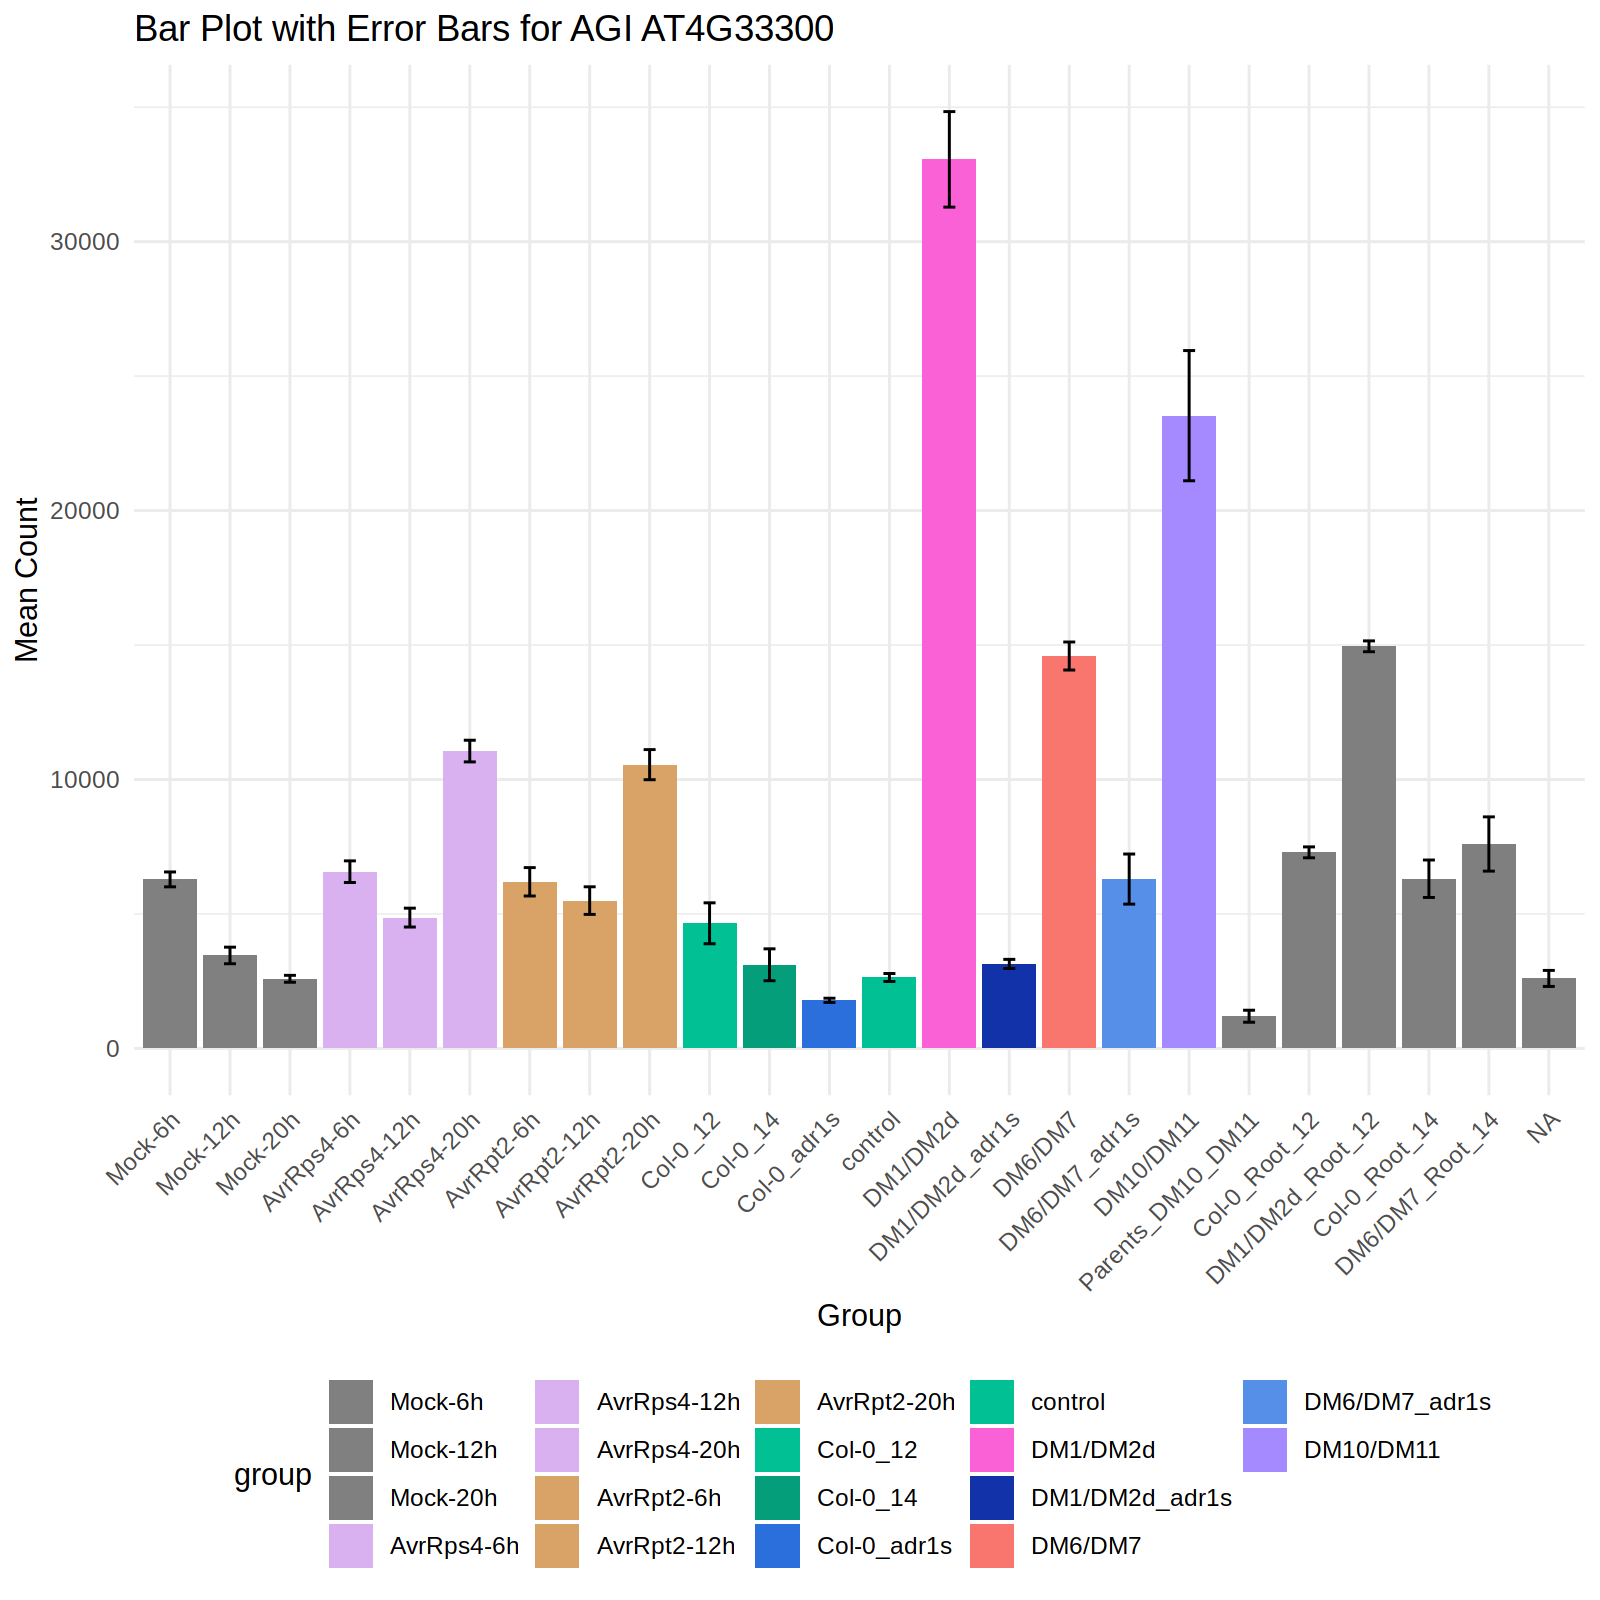

In [69]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count , "AT4G33300") #ADR1-L1


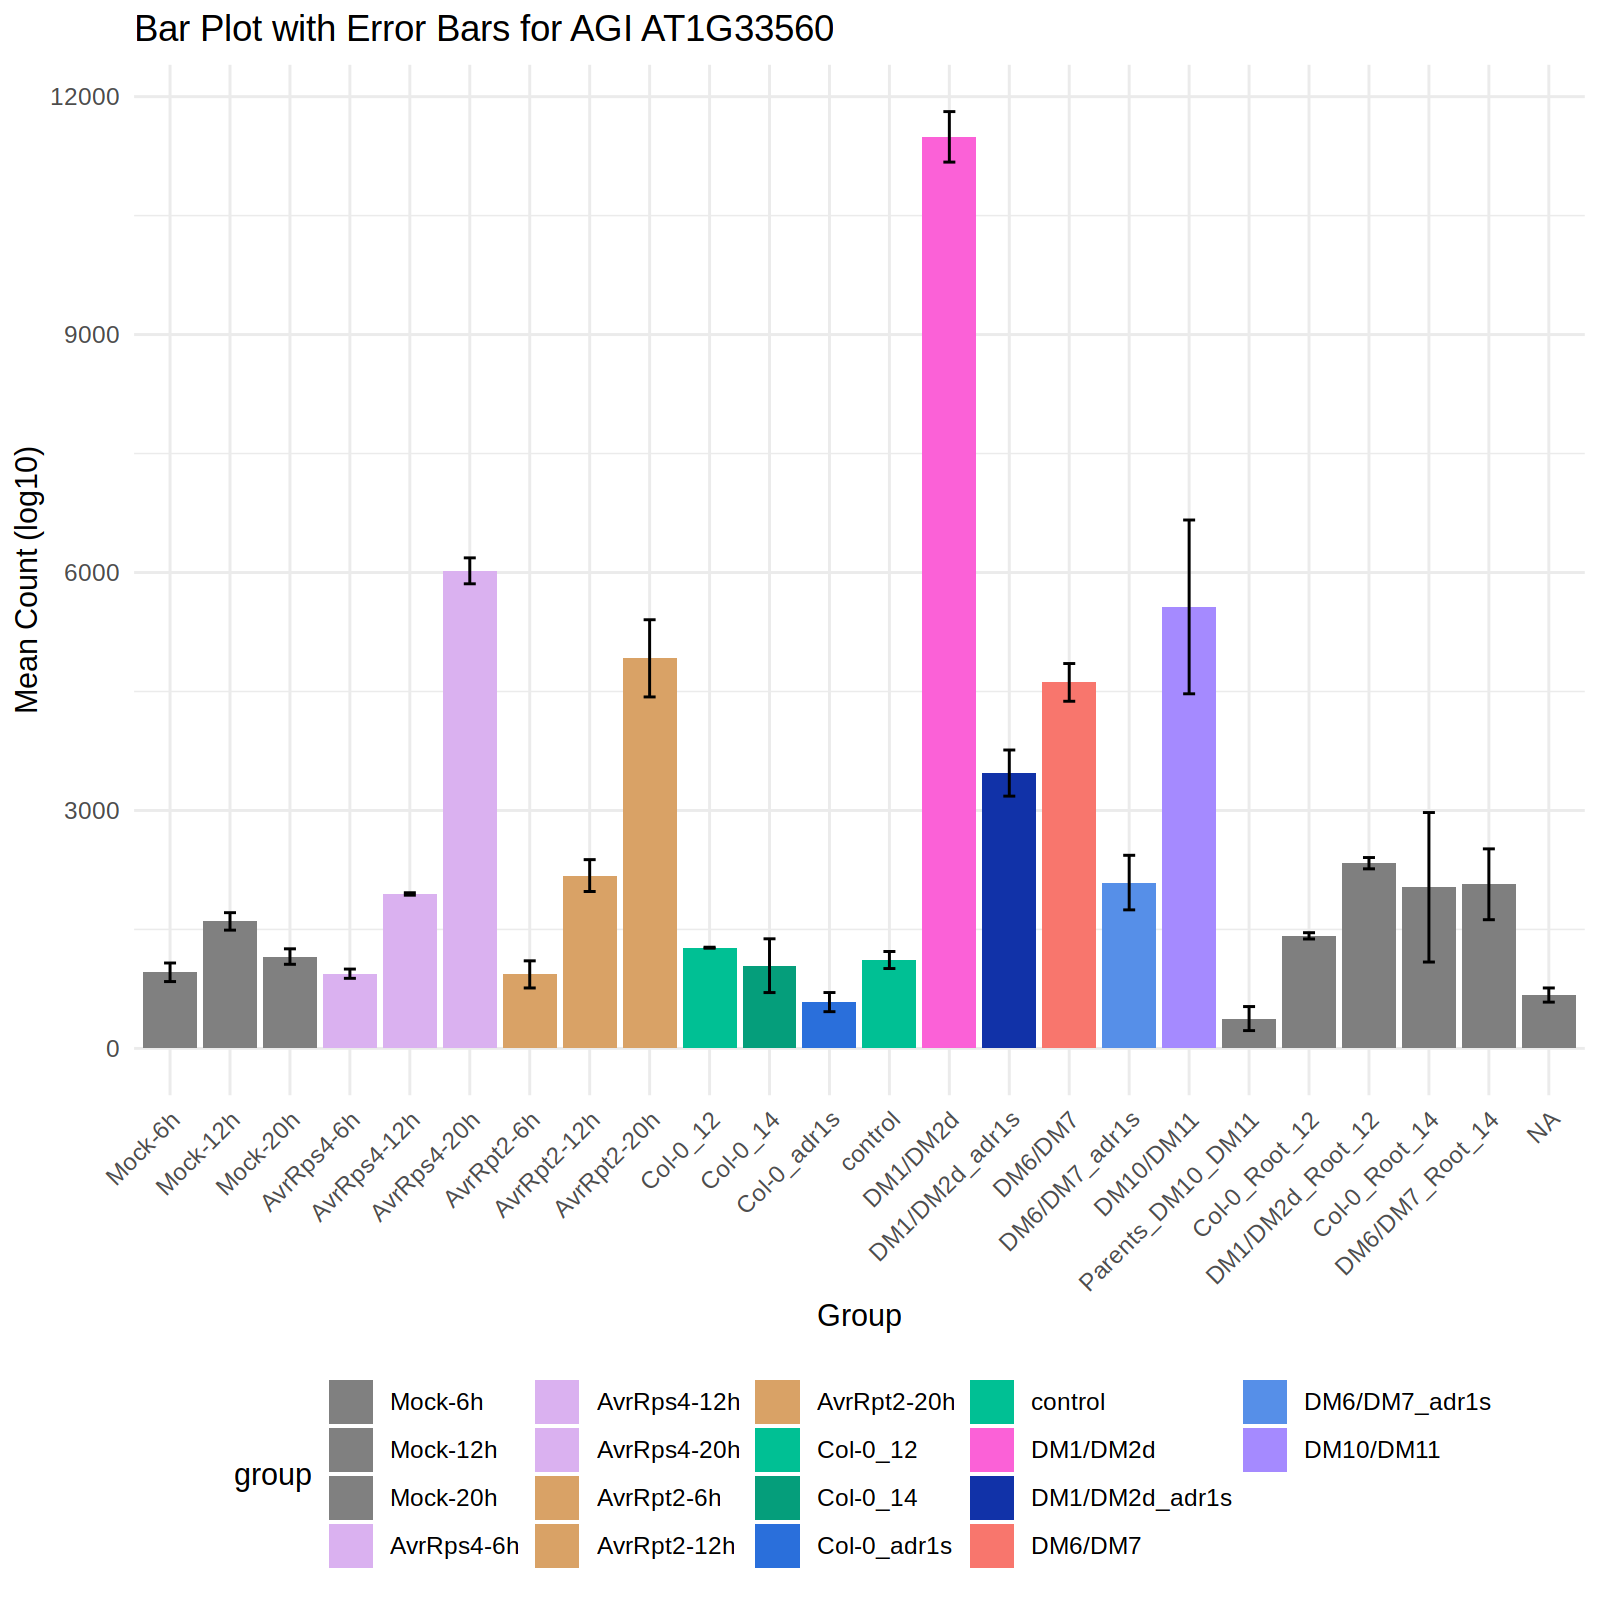

In [70]:
create_bar_plot <- function(df, AGI) {
  df_filtered <- df %>%
    filter(AGI == !!AGI)

  ggplot(df_filtered, aes(x = group, y = mean_count, fill = group)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_errorbar(aes(ymin = mean_count - sd, ymax = mean_count + sd), width = 0.2, position = position_dodge(0.9)) +
    theme_minimal() +
    scale_fill_manual(values = custom_colors) +
    labs(x = "Group", y = "Mean Count (log10)", title = paste("Bar Plot with Error Bars for AGI", AGI)) +
    theme(legend.position = 'bottom',
          axis.text.x = element_text(angle = 45, hjust = 1)) 
}

# Replace "AT1G01010" with the desired AGI
create_bar_plot(mean_sd_count, "AT1G33560") #ADR1


# NLRs

In [71]:
counts_fill_color <- c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                               'DM10/DM11' = '#D1CDE6',  
                               'DM6/DM7_adr1s' = '#31a354' , 'Col-0_12' = '#5c6ee0',
                               'DM1/DM2d_adr1s' = '#31a354', 'Col-0_adr1s' = '#31a354')

In [72]:
NLRs_table <- openxlsx::read.xlsx('../gene_table_and_other_scripts//NLRs_167.xlsx') 
NLRs_table <- NLRs_table %>% dplyr::select(AGI, Class, Organization, Symbol) #%>% dplyr::rename('GeneFamily' = 'Class')

In [73]:
NLRs_counts <- mean_sd_count %>% right_join(NLRs_table, by = 'AGI')

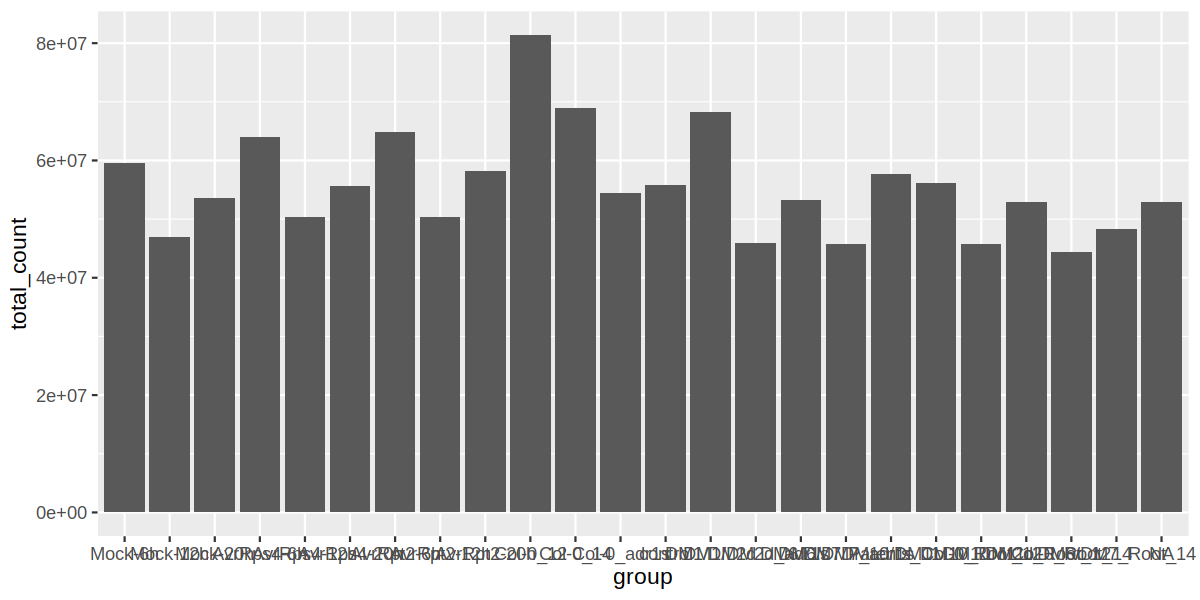

In [75]:
options(repr.plot.width= 8, repr.plot.height=4, repr.plot.res = 150)
mean_sd_count %>% group_by(group) %>% summarise(total_count = sum(mean_count)) %>% 
    ggplot(aes(x= group, y = total_count) ) + geom_bar(stat = 'identity')

In [78]:
NLRs_counts %>% pull(group) %>% unique
NLRs_counts %>% pull(background) %>% unique

[1] AvrRps4-12h       AvrRps4-20h       AvrRps4-6h        AvrRpt2-12h      
 [5] AvrRpt2-20h       AvrRpt2-6h        Col-0_12          <NA>             
 [9] Col-0_14          Col-0_adr1s       Col-0_Root_12     Col-0_Root_14    
[13] control           DM1/DM2d          DM1/DM2d_adr1s    DM1/DM2d_Root_12 
[17] DM10/DM11         DM6/DM7           DM6/DM7_adr1s     DM6/DM7_Root_14  
[21] Mock-12h          Mock-20h          Mock-6h           Parents_DM10_DM11
23 Levels: Mock-6h Mock-12h Mock-20h AvrRps4-6h AvrRps4-12h ... DM6/DM7_Root_14

[1] "Col-0"     "Root_12"   "Root_14"   "DM1/DM2d"  "DM10/DM11" "DM6/DM7"  
[7] NA

In [84]:
groups_to_plot <- c('Col-0_12', 'Col-0_adr1s', 'DM1/DM2d', 'DM1/DM2d_adr1s', 'DM6/DM7', 'DM6/DM7_adr1s' )

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


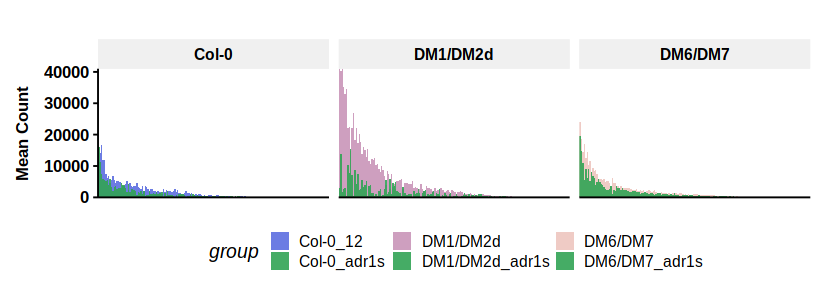

In [85]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 100)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1, aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


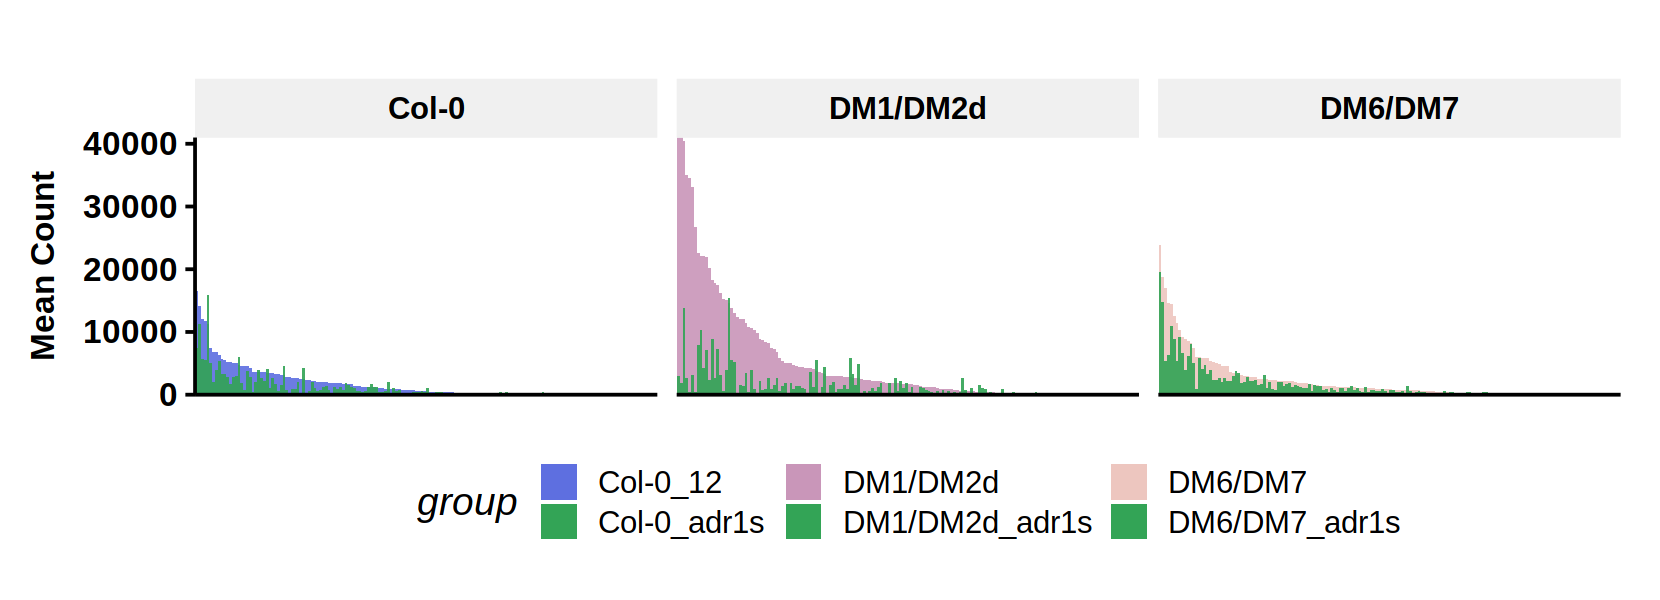

In [86]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


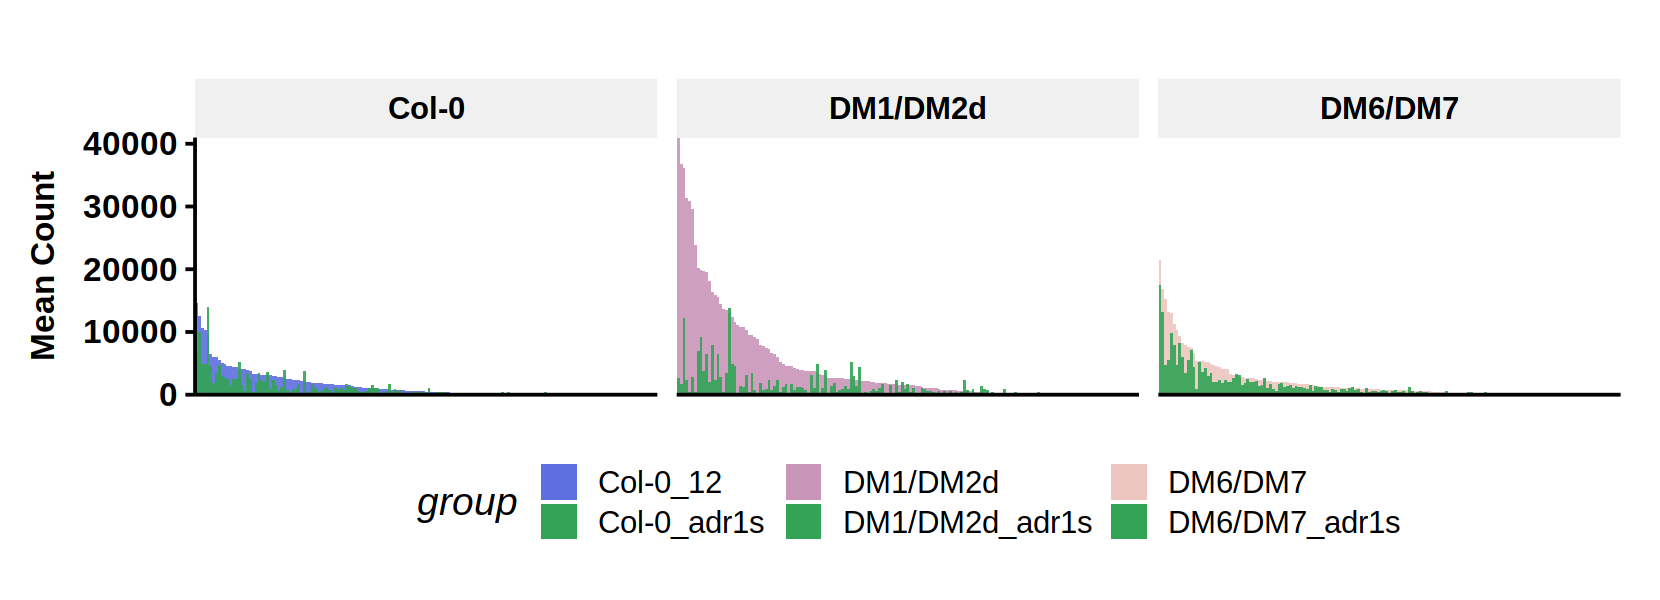

In [229]:
options(repr.plot.width= 8.3 , repr.plot.height=3, repr.plot.res = 200)

NLRs_counts1 <- NLRs_counts %>% filter(group %in% groups_to_plot)

bar_profile <- ggplot(NLRs_counts1 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = 3, width = 7.8)


In [88]:
NLRs_counts %>% pull(group) %>% unique

[1] AvrRps4-12h       AvrRps4-20h       AvrRps4-6h        AvrRpt2-12h      
 [5] AvrRpt2-20h       AvrRpt2-6h        Col-0_12          <NA>             
 [9] Col-0_14          Col-0_adr1s       Col-0_Root_12     Col-0_Root_14    
[13] control           DM1/DM2d          DM1/DM2d_adr1s    DM1/DM2d_Root_12 
[17] DM10/DM11         DM6/DM7           DM6/DM7_adr1s     DM6/DM7_Root_14  
[21] Mock-12h          Mock-20h          Mock-6h           Parents_DM10_DM11
23 Levels: Mock-6h Mock-12h Mock-20h AvrRps4-6h AvrRps4-12h ... DM6/DM7_Root_14

In [129]:
NLRs_counts2 <- NLRs_counts %>% filter(group %in% c('Col-0_Root_12', 'Col-0_Root_14', 
                              'DM6/DM7_Root_14', 'DM1/DM2d_Root_12', 
                                'Col-0_12', 'Col-0_14', 'DM1/DM2d',  'DM6/DM7'))

In [130]:
NLRs_counts2 <- NLRs_counts2 %>%
  mutate(tissue = if_else(str_detect(group, "Root"), "Root", "Shoot")) %>% mutate(
      DAG = case_when(str_detect(group, "_12$") ~ "DM1/DM2d",
                      str_detect(group, "_14$") ~ "DM6/DM7",
                      str_detect(group, "DM7") ~ "DM6/DM7",
                      str_detect(group, "DM2d") ~ "DM1/DM2d",
            )) 


In [227]:
options(repr.plot.width= 8.3 , repr.plot.height=7, repr.plot.res = 200)

bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('adr1', neg = TRUE)), aes(x = reorder(interaction(AGI, background), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts1 %>% filter(group %>% str_detect('adr1')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  facet_grid(cols = vars(background), scales = "free_x", space = "free_x") +
  scale_fill_manual(values = counts_fill_color) +
    theme_Publication() + coord_cartesian(ylim=c(0, 41000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [228]:
library(tidytext)

In [230]:
Roots_Shoot_NLRs_bar_profile <- ggplot(NLRs_counts2 %>% filter(group %>% str_detect('DM')), 
    aes(x = reorder_within(interaction(AGI, tissue), -mean_count, tissue), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +

    geom_bar(data = NLRs_counts2 %>% filter(group %>% str_detect('Col')), stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
    facet_grid(cols = vars(tissue), rows = vars(DAG), scales = "free_x") +
      labs(x = "AGI", y = "Mean Count") +
  scale_fill_manual(values = c("DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 'DM1/DM2d_Root_12' = '#C894B8', "DM6/DM7_Root_14" = "#EDC5BF", 'Col-0_12' = "#58B695", 'Col-0_14' = "#4B9D7E", 'Col-0_Root_14' = "#4B9D7E", 'Col-0_Root_12' = "#58B695")) +
  scale_y_continuous(expand = c(0, 0)) +
  theme_Publication() + coord_cartesian(ylim=c(0, 42000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 

In [233]:
Roots_Shoot_NLRs_bar_profile %>% ggsave(file = paste0("./plots/Roots_Shoot_NLRs_bar_profile", Sys.time(), ".pdf") , width = 4, height = 4)

In [183]:
NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr|Mock'))

In [184]:
NLRs_counts_Avr %>% ungroup %>% sample_n(60)

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AT5G46510,AvrRpt2-20h,3.564944e+02,43.186965,AT5G46510,Col-0,TIR-NBS-LRR,clustered,VICTL
AT5G45060,Mock-6h,4.066494e+03,254.341316,AT5G45060,Col-0,TIR-NBS-LRR,clustered,AT5G45060
AT1G63730,AvrRps4-20h,1.022767e+02,17.965071,AT1G63730,Col-0,TIR-NBS-LRR,NA,AT1G63730
AT5G46470,AvrRps4-12h,2.355707e+03,263.973182,RPS6,Col-0,TIR-NBS-LRR,clustered,RPS6
AT5G22690,AvrRpt2-12h,5.502947e+02,51.236763,AT5G22690,Col-0,TIR-NBS-LRR,NA,AT5G22690
AT5G44510,AvrRps4-6h,5.111849e+02,16.245534,TAO1,Col-0,TIR-NBS-LRR,NA,TAO1
AT5G45260,AvrRpt2-20h,1.289182e+03,23.623530,RRS1,Col-0,TIR-NBS-LRR,clustered,RRS1
AT1G58390,AvrRpt2-6h,5.784388e+00,3.367047,AT1G58390,Col-0,CC-NBS-LRR,clustered,AT1G58390
AT1G59218,Mock-12h,4.606748e+02,14.743176,AT1G59218,Col-0,CC-NBS-LRR,clustered,RPP13


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


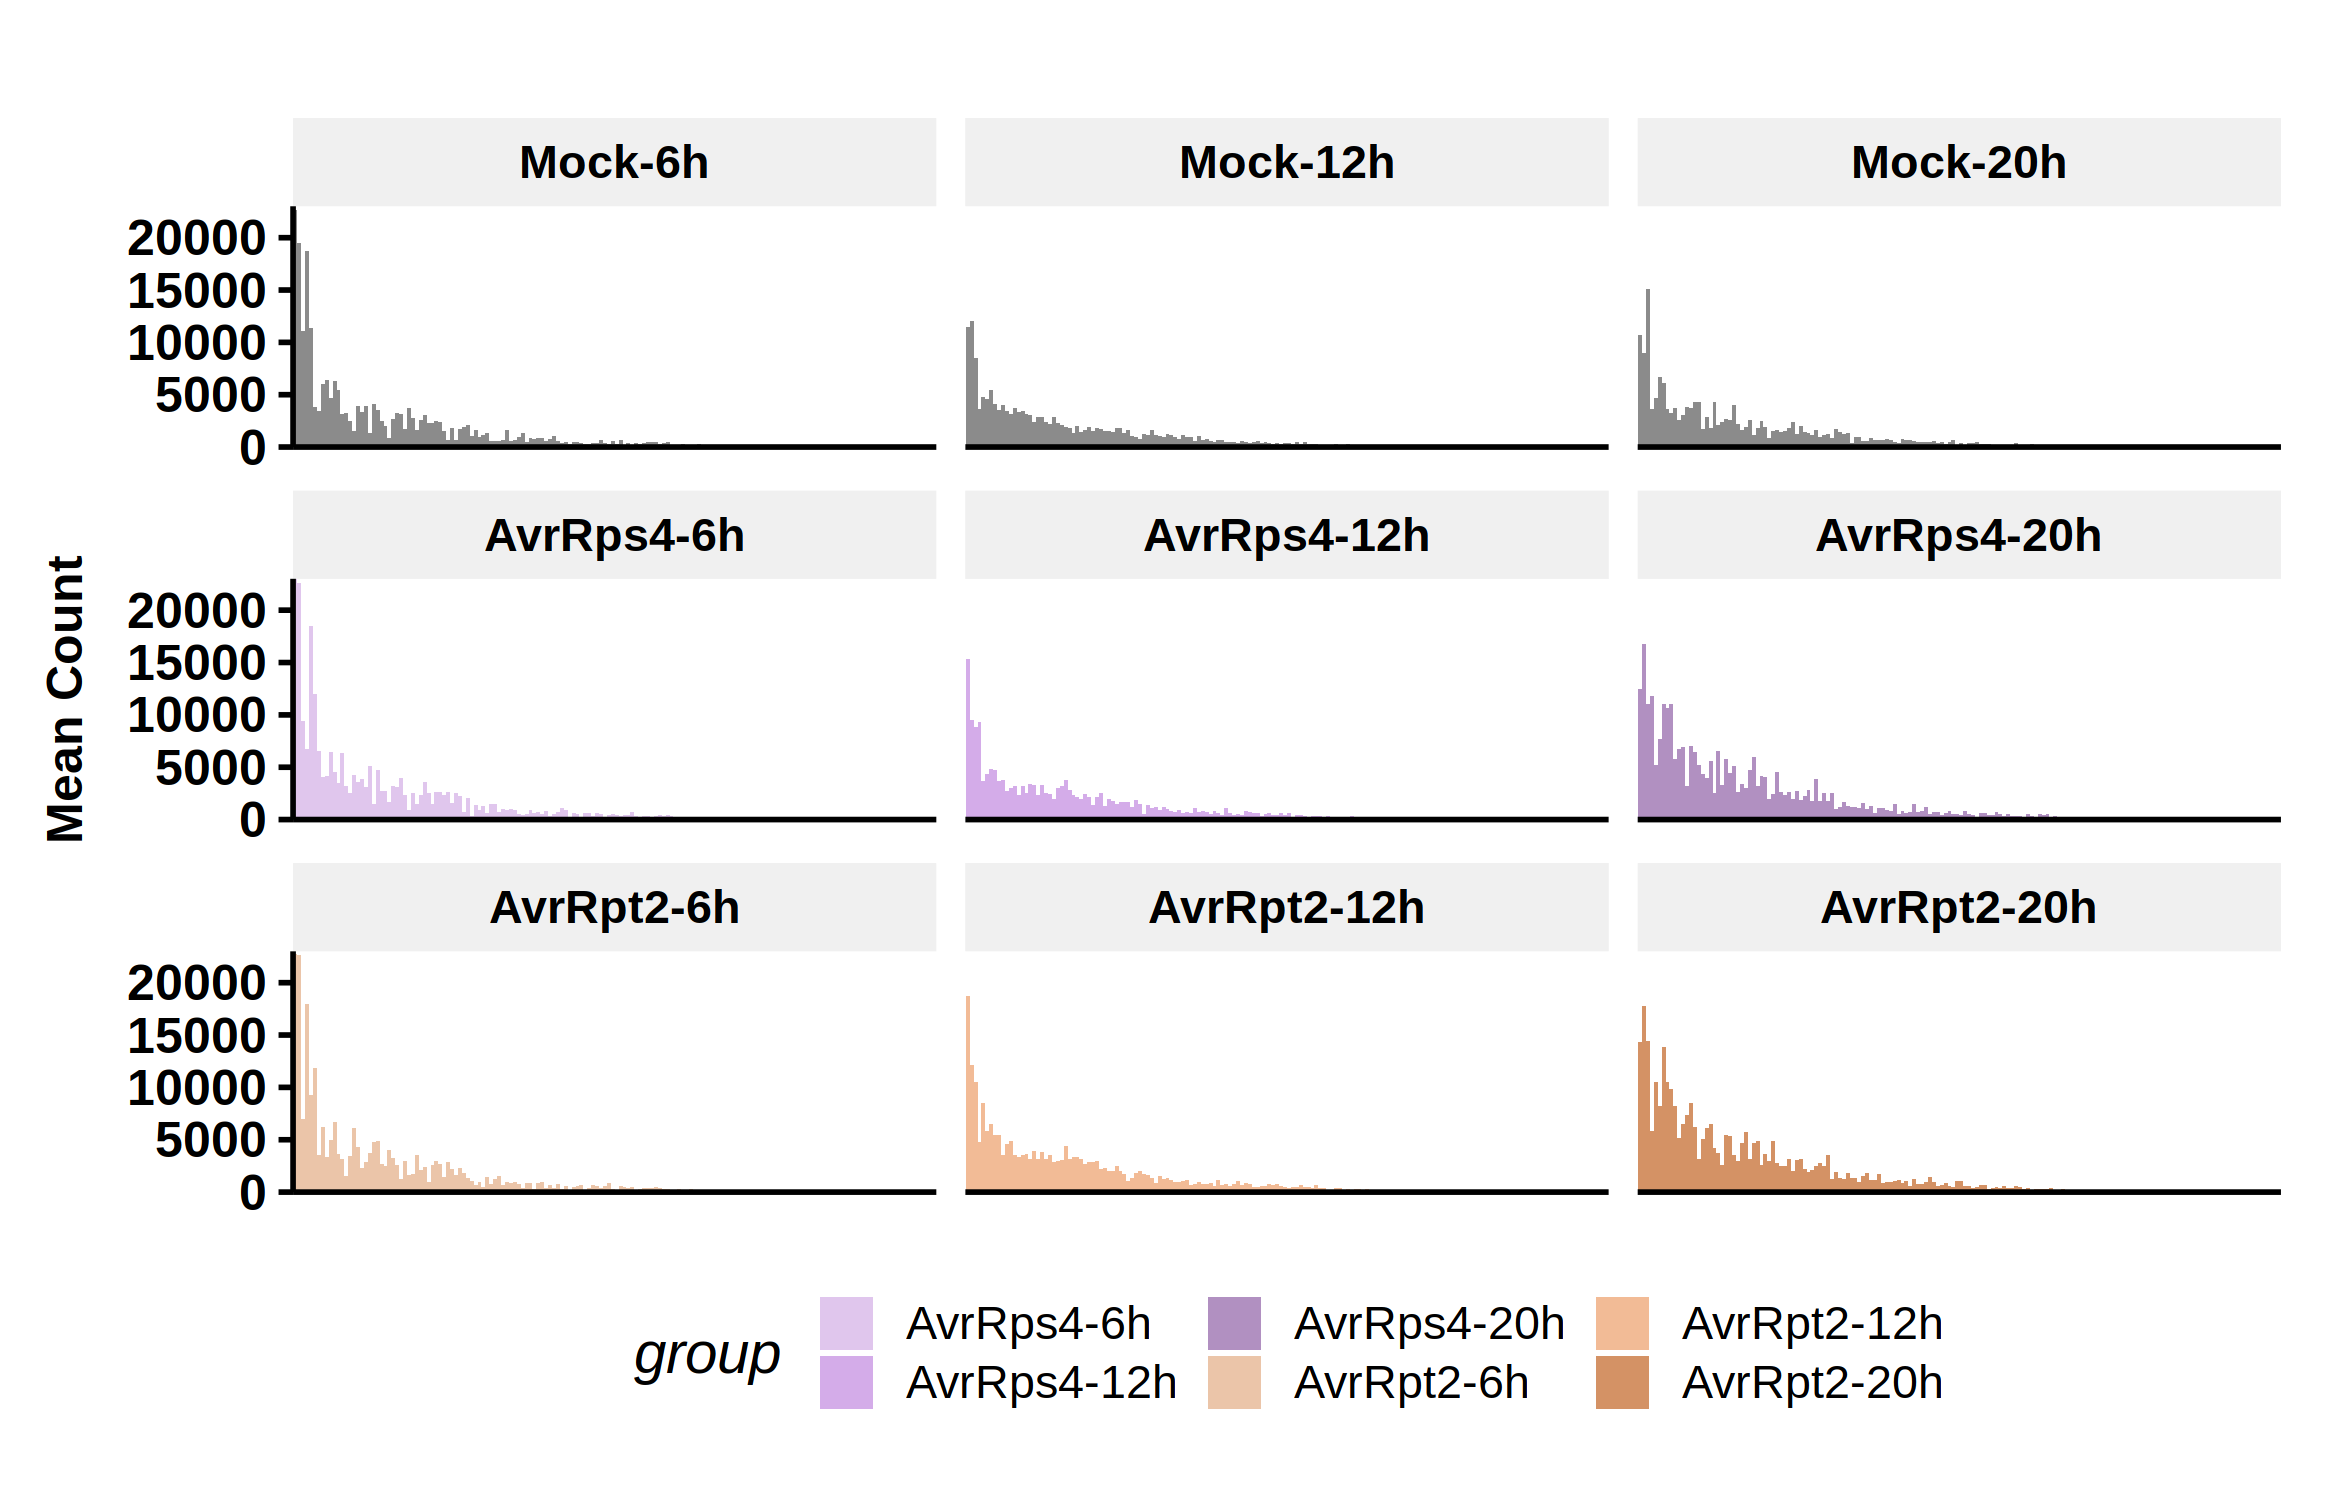

In [185]:
width_ = 7.8
height_ = 5
options(repr.plot.width= width_, repr.plot.height= height_, repr.plot.res = 300)

# NLRs_counts_Avr <- NLRs_counts %>% filter(group %>% str_detect('Avr'))
NLRs_counts_Avr <- NLRs_counts_Avr %>% mutate(treatment = group %>% str_remove('-\\d{1,2}h$'))

bar_profile <- ggplot(NLRs_counts_Avr, aes(x = reorder(interaction(AGI, treatment), -mean_count), y = mean_count, fill = group)) +
  geom_bar(stat = 'identity', 
           position = "identity",  alpha = 0.9,
           width = 1) +
  labs(x = "AGI", y = "Mean Count") +
  scale_fill_discrete(name = "Group") + scale_y_continuous(expand = c(0, 0)) +
  # facet_grid(cols = vars(group), scales = "free_x", space = "free_x") +
facet_wrap(~ group, ncol = 3, scales = "free_x") +
  scale_fill_manual(values = c(      "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")) +
    theme_Publication() + coord_cartesian(ylim=c(0, 23000)) +
    theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text = element_text(size = 12, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.x = element_blank()) 
bar_profile
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.pdf'), height = height_, width = width_)


In [186]:
bar_profile %>% ggsave(file = paste0('./plots/', 'NLR_profile_bar_', Sys.time(), '.jpeg'), height = 3, width = 8.2)

# Bar plot of NLRs

In [197]:
library(glue)
library(ggtext)
library(ggh4x)
library(ggbreak) 

In [198]:
dds

class: DESeqDataSet 
dim: 28127 82 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(28127): AT1G30814 AT1G78930 ... ATCG01180 ATCG00950
rowData names(115): baseMean baseVar ... maxCooks replace
colnames(82): DM1/DM2d_1 Col-0_12_1 ... S20-B S20-C
colData names(20): short_name sample_Names ... sizeFactor replaceable

### choose significantly changed NLRs

In [199]:
Res_combined <-  readRDS('../Pathway_plot/Rdata/Res_combined.rds')

In [205]:
res_DM1_DM2d_Root_assay <- res_DM1_DM2d_Root %>%  as.data.frame %>% tibble::rownames_to_column("AGI") %>% 
    mutate(source = 'DM1/DM2d_Root')
res_DM6_DM7_Root_assay <- res_DM6_DM7_Root %>%  as.data.frame %>% tibble::rownames_to_column("AGI") %>% 
    mutate(source = 'DM6/DM7_Root')

AGI,log2FC,source
<chr>,<dbl>,<chr>
AT1G30814,0.32259691,DM1/DM2d_Root
AT1G78930,1.23035567,DM1/DM2d_Root
AT1G71695,0.93190721,DM1/DM2d_Root
AT1G58983,-0.93375058,DM1/DM2d_Root
AT1G12980,0.00000000,DM1/DM2d_Root
AT1G56250,0.66892545,DM1/DM2d_Root
AT1G66852,0.00000000,DM1/DM2d_Root
AT1G69810,-0.05598775,DM1/DM2d_Root
AT1G72450,0.49909206,DM1/DM2d_Root


In [209]:
Res_combined <- Res_combined %>% rbind(res_DM1_DM2d_Root_assay %>% rbind(res_DM6_DM7_Root_assay) %>% dplyr::rename('log2FC' = `log2FoldChange`) %>% 
    select(AGI, log2FC, source))

In [210]:
sig_NLRs <- Res_combined %>% filter(source %in% groups_to_plot ) %>% right_join(NLRs_table, by = 'AGI') %>%
    filter(abs(log2FC ) > 1)  %>% pull(AGI) %>% unique 
sig_NLRs %>% length

[1] 133

### make color markdown

In [211]:
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330",
          'P-loop' = "#7fc97f"
         )
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% dplyr::rename(label_color = 2)

In [212]:
sigNLRs_counts <- NLRs_counts %>% filter(AGI %in% sig_NLRs) 

In [213]:
sigNLRs_counts <- sigNLRs_counts %>% group_by(AGI) %>%
  filter(any(mean_count > 10)) %>% ungroup()

In [214]:
sigNLRs_counts <- sigNLRs_counts %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [215]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- sigNLRs_counts %>% dplyr::select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [216]:
NLRs_color <- sigNLRs_counts %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [222]:
NLRs_color

AGI,group,mean_count,sd,gene_name,background,Class,Organization,Symbol,plot_label,label_color,label_color_markdown
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>
AT1G12210,AvrRps4-12h,34.958161,8.508928,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,AvrRps4-20h,12.443332,3.374207,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,AvrRps4-6h,9.551627,8.118339,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,AvrRpt2-12h,29.543024,9.127061,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,AvrRpt2-20h,15.512320,2.780904,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,AvrRpt2-6h,8.615255,9.665957,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,Col-0_12,72.702841,1.093838,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,NA,12.534545,2.075634,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>
AT1G12210,Col-0_14,15.041810,7.784992,RFL1,Col-0,CC-NBS-LRR,clustered,RFL1,RFL1_AT1G12210,#fdb462,<i style='color: #fdb462'>RFL1_AT1G12210</i>


In [217]:
NLRs_color_max <- NLRs_color  %>% arrange( -mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [218]:
NLRs_color_min <- NLRs_color  %>% arrange(mean_count)  %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>%
    arrange(mean_count)

In [219]:
NLRs_color_Col <- NLRs_color  %>% filter(group == 'Col-0_12') %>% arrange(mean_count)

In [220]:
library(purrr)
NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
layers <- list()

# Step 3: Iterate until there are no rows left in over0 and below0
layer_num <- 1
while (nrow(NLRs_color_temp) > 0) {
    current_max_NLR <- NLRs_color_temp %>% group_by( AGI) %>% slice_max(mean_count)
    NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
    layers[[layer_num]] <- current_max_NLR
    layer_num <- layer_num + 1
}


Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard


The following object is masked from ‘package:GenomicRanges’:

    reduce


The following object is masked from ‘package:IRanges’:

    reduce




Warning message in geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, :
“Ignoring unknown parameters: ``”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation intro

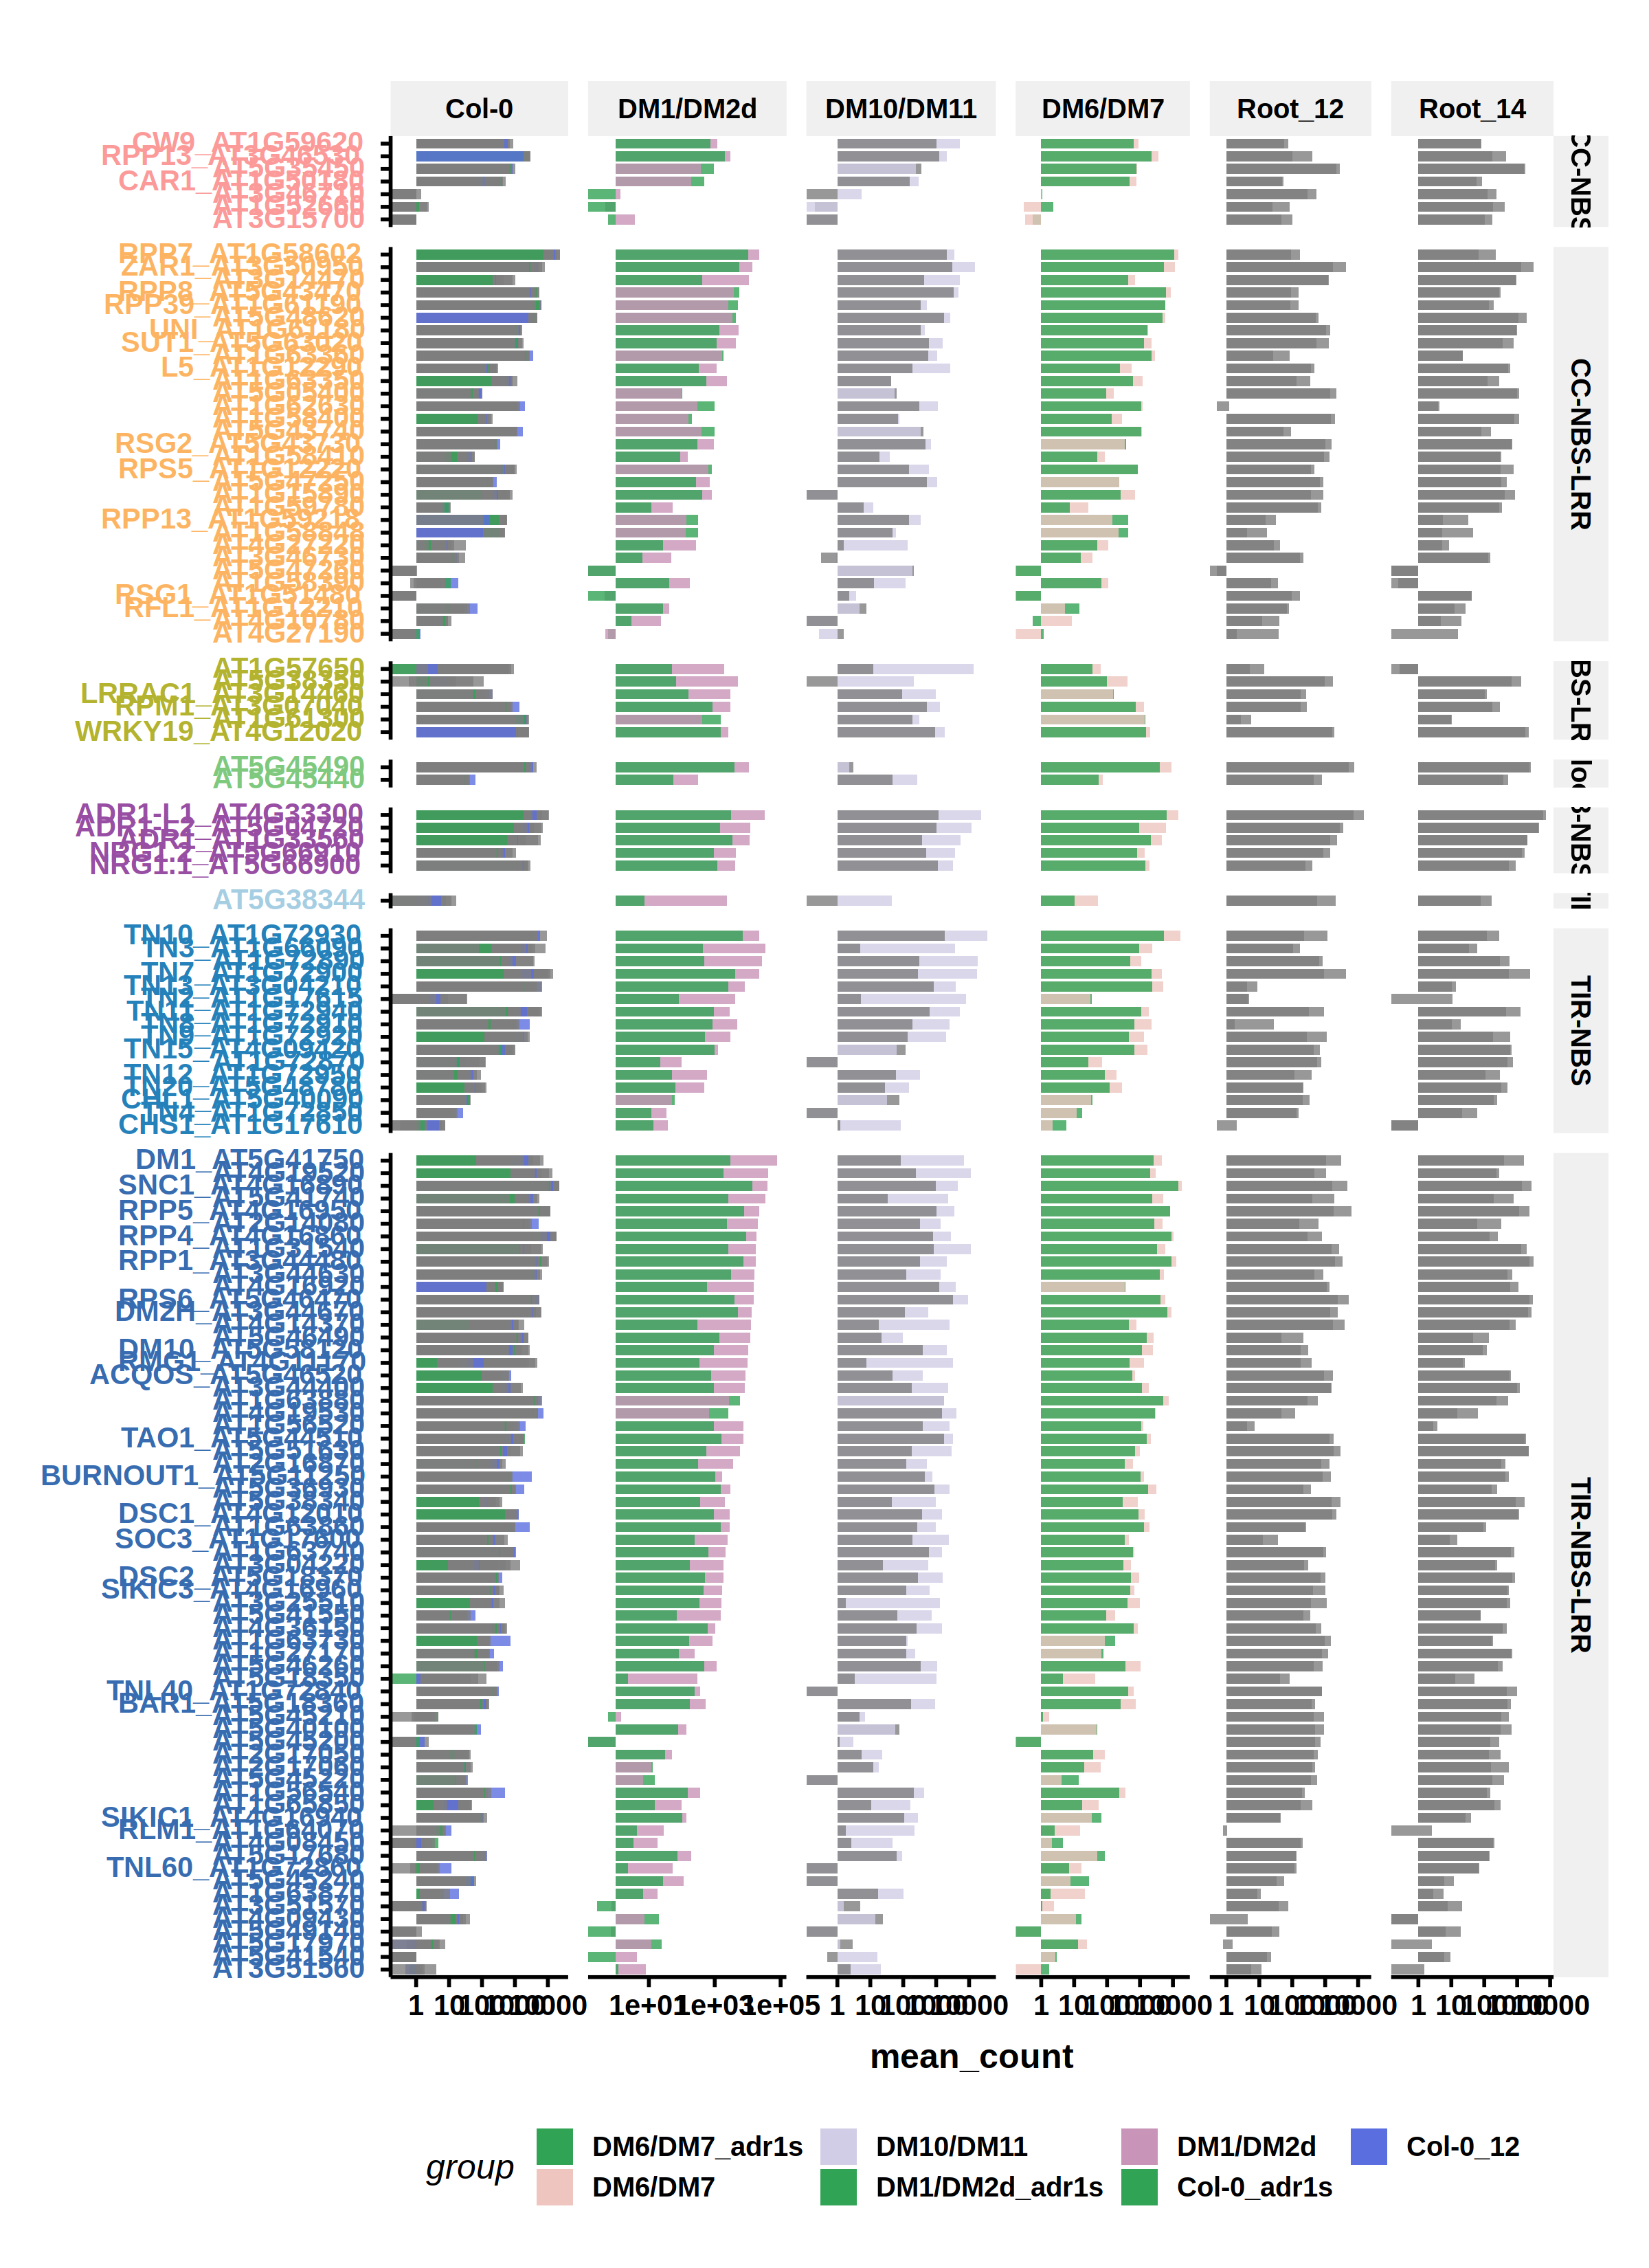

In [221]:
options(repr.plot.width= 8, repr.plot.height=11, repr.plot.res = 300)
NLRs_plot_base <- NLRs_color %>% ggplot(aes(x = label_color_markdown,
                                            fill = group, 
                                            y = mean_count, label = label_color_markdown)) +
    labs(y = "mean_count") + #coord_cartesian(ylim=c(0, 40000)) +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_manual(values = counts_fill_color)+
    theme_Publication() +
    theme(axis.text = element_text(size = 10, face = "bold"),
          axis.title = element_text(size = 12, face = "bold"),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 12, family = "sans", face = 'bold')) +
    facet_grid(rows = vars(Class), cols = vars(background),
                scales = "free",    space = "free") +
    theme(axis.text.y = element_markdown())   +
    geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, mean_count)),
             position = "identity",  stat = 'identity', 
             aes(fill = group), width = .8,  alpha = 0 ) + scale_y_log10()

bar_NLRs <- reduce(layers, function(plot, layer) {
  plot +
    geom_bar(data = layer,
             position = "identity",
             stat = 'identity',
             width = .8,
             alpha = 0.8)
}, .init = NLRs_plot_base)

bar_NLRs
bar_NLRs %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 16, width = 8.3)


# TIR_only

In [219]:
TIR_only <- readxl::read_excel("../gene_table_and_other_scripts/Col-0 TIR domains from WanLi.xlsx") 

In [220]:
TIR_only <- TIR_only %>% dplyr::select(AGI) %>% left_join(mean_sd_count, by ='AGI')

In [221]:
TIR_only 

AGI,group,mean_count,sd,gene_name,background
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>
AT1G09665,AvrRps4-12h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,AvrRps4-20h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,AvrRps4-6h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,AvrRpt2-12h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,AvrRpt2-20h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,AvrRpt2-6h,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,Col-0_12,1.6233492,0.06218131,AT1G09665,Col-0
AT1G09665,NA,0.0000000,0.00000000,AT1G09665,Col-0
AT1G09665,Col-0_14,1.3238153,2.64763070,AT1G09665,Col-0


In [222]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_in_connectivity_table.csv') 

In [223]:
library(purrr)


Warning message in geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, :
“Ignoring unknown parameters: ``”


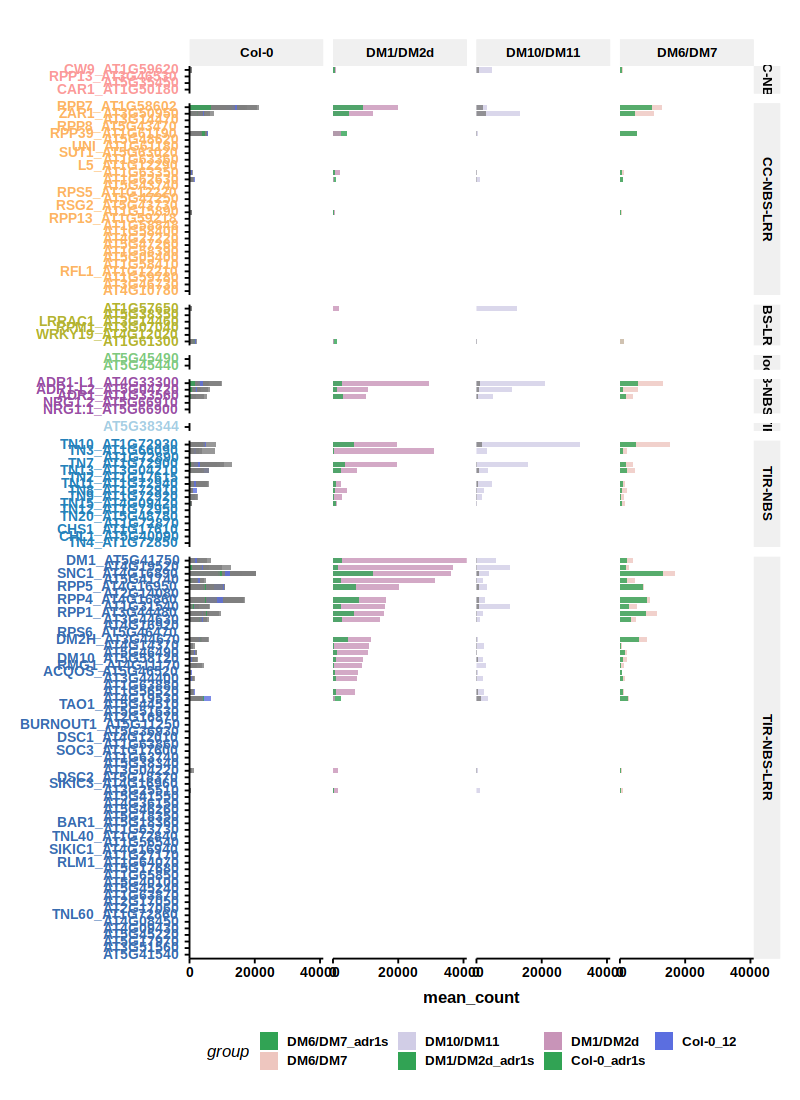

In [224]:
options(repr.plot.width= 8, repr.plot.height=11, repr.plot.res = 100)

create_barplot <- function(NLRs_color) {

  NLRs_color_temp <- NLRs_color %>% arrange(desc(mean_count))
  layers <- list()

  layer_num <- 1
  while (nrow(NLRs_color_temp) > 0) {
      current_max_NLR <- NLRs_color_temp %>% group_by(AGI) %>% slice_max(mean_count)
      NLRs_color_temp <- suppressMessages(anti_join(NLRs_color_temp, current_max_NLR))
      layers[[layer_num]] <- current_max_NLR
      layer_num <- layer_num + 1
  }

  NLRs_plot_base <- NLRs_color %>% ggplot(aes(x = label_color_markdown,
                                              fill = group, 
                                              y = mean_count, label = label_color_markdown)) +
      labs(y = "mean_count") +
      coord_flip() +
      guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
      scale_y_continuous(expand = c(0, 0), 
                         breaks = c(0, 20000, 40000), 
                         limits = c(0, 41000), 
                         oob = scales::squish) +
      scale_fill_manual(values = counts_fill_color)+
      theme_Publication() +
      theme(axis.text = element_text(size = 10, face = "bold"),
            axis.title = element_text(size = 12, face = "bold"),
            axis.title.y = element_blank()) +
      theme(text = element_text(size = 12, family = "sans", face = 'bold')) +
      facet_grid(rows = vars(Class), cols = vars(background),
                  scales = "free",    space = "free") +
      theme(axis.text.y = element_markdown())   +
      geom_bar(data = NLRs_color_max, aes(x = reorder(label_color_markdown, mean_count)),
               position = "identity",  stat = 'identity', 
               aes(fill = group), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               width = .8,
               alpha = 0.8)
  }, .init = NLRs_plot_base)

  return(bar_NLRs)
}

# Assuming NLRs_color is your data frame
resulting_plot <- create_barplot(NLRs_color %>% filter(AGI %in% NLRs_in_connectivity_table$gene))
resulting_plot

# bar_NLRs %>% ggsave(file = paste0('./plots/', 'count_barplot-', Sys.time(), '.pdf'), height = 16, width = 8.3)


In [248]:
mean_sd_count 

AGI,group,mean_count,sd,gene_name,background
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>
AT1G01010,AvrRps4-12h,881.6935,142.51058,NAC001,Col-0
AT1G01010,AvrRps4-20h,1189.2792,137.24944,NAC001,Col-0
AT1G01010,AvrRps4-6h,776.2460,102.95219,NAC001,Col-0
AT1G01010,AvrRpt2-12h,957.1172,84.67292,NAC001,Col-0
AT1G01010,AvrRpt2-20h,1304.8013,131.89261,NAC001,Col-0
AT1G01010,AvrRpt2-6h,831.4939,69.22368,NAC001,Col-0
AT1G01010,Col-0_12,283.5816,45.01274,NAC001,Col-0
AT1G01010,Col-0_12_2,274.0635,32.83078,NAC001,Col-0
AT1G01010,Col-0_14,246.8481,108.52720,NAC001,Col-0


In [268]:
LRRs_connectivity_table_info <- read.csv('./WGCNA_output_all/LRRs_connectivity_table_info.csv') 

In [278]:
mean_sd_count_LRR <- LRRs_connectivity_table_info %>% dplyr::select(-gene_name) %>% left_join(map_id_name, by = c('gene' = 'gene_id')) %>%
    select(gene, gene_name, connectivity_rowSums_adj, module, GeneFamily) %>% left_join(mean_sd_count %>% dplyr::select(-gene_name), by = c('gene' = 'AGI'))

In [279]:
mean_sd_count_LRR %>% pull(module) %>% unique

[1] "MEcyan"         "MEblue"         "MEdarkgreen"    "MEgreenyellow" 
[5] "MEmidnightblue"

In [285]:
mean_sd_count_LRR %>% pull(group) %>% unique

[1] AvrRps4-12h       AvrRps4-20h       AvrRps4-6h        AvrRpt2-12h      
 [5] AvrRpt2-20h       AvrRpt2-6h        Col-0_12          Col-0_12_2       
 [9] Col-0_14          Col-0_adr1s       Col-0_Root_12     Col-0_Root_14    
[13] control           DM1/DM2d          DM1/DM2d_adr1s    DM1/DM2d_Root_12 
[17] DM10/DM11         DM6/DM7           DM6/DM7_adr1s     DM6/DM7_Root_14  
[21] Mock-12h          Mock-20h          Mock-6h           Parents_DM10_DM11
24 Levels: Mock-6h Mock-12h Mock-20h AvrRps4-6h AvrRps4-12h ... DM6/DM7_Root_14

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals”
Warning message:
“`position_dodge()` requires non-overlapping x intervals”
Warning message:
“`position_dodge()` requires non-overlapping x intervals”
Warning message:
“`position_dodge()` requires non-overlapping x intervals”


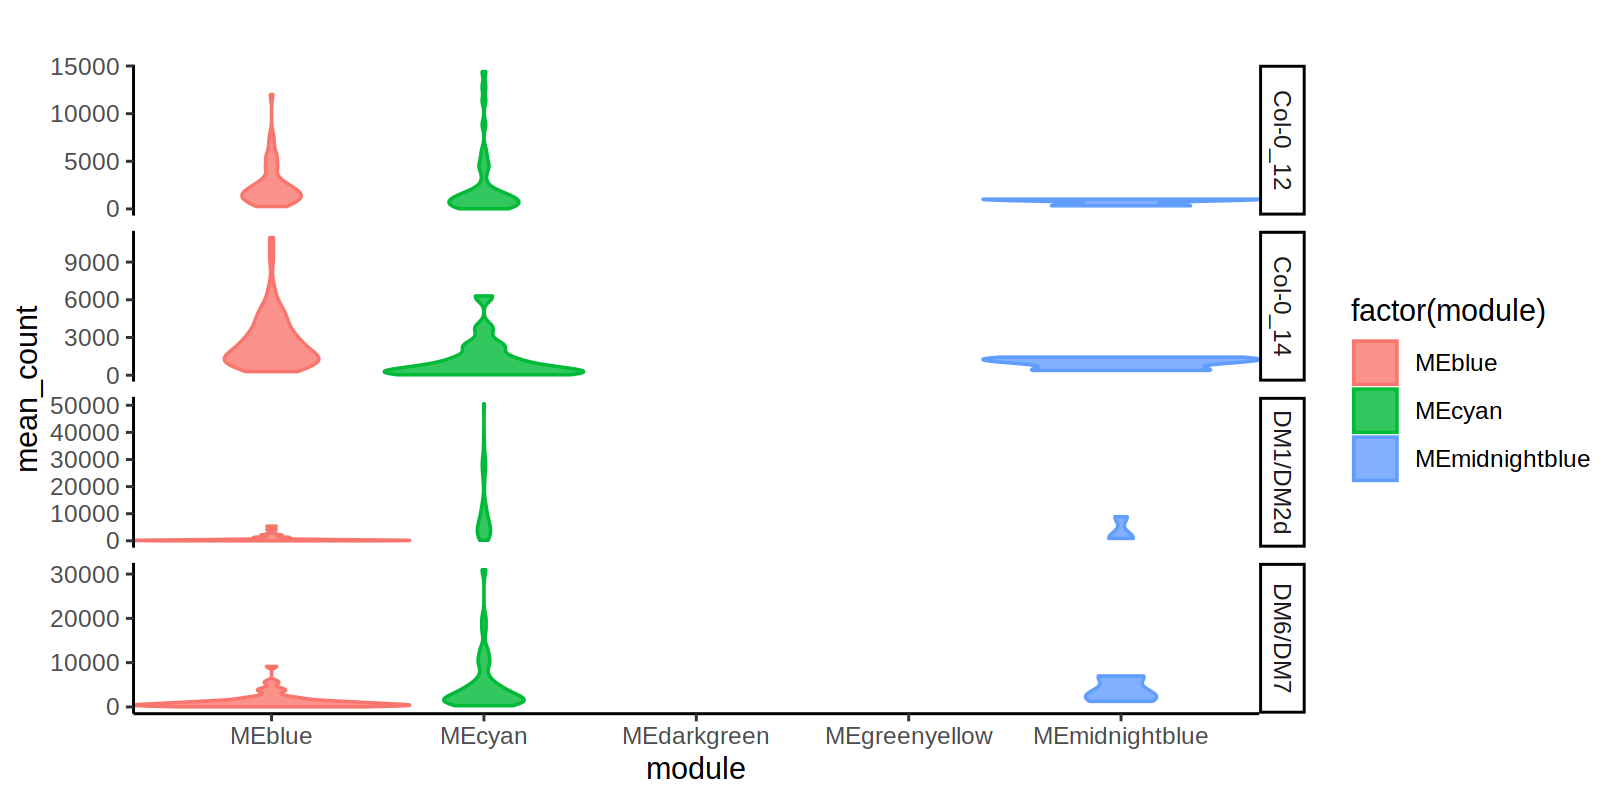

In [286]:
width_ = 8.1
height_ = 4
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

mean_sd_count_LRR %>% filter(group %in% c('Col-0_12', 'DM1/DM2d', 'DM6/DM7', 'Col-0_14')) %>%
    ggplot( aes(x = module, y = mean_count)) +  
    ggtitle('') + theme_classic() + 
    geom_violin( aes(color = factor(module), fill = factor(module)), width = 1.3,
                     alpha = 0.8, size = 0.6) +
    facet_grid(rows = vars(group), scales = "free")